In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

In [304]:
df=pd.read_csv("data/Input.csv")

In [305]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty_dot_url                 88647 non-null  int64
 1   qty_hyphen_url              88647 non-null  int64
 2   qty_underline_url           88647 non-null  int64
 3   qty_slash_url               88647 non-null  int64
 4   qty_equal_url               88647 non-null  int64
 5   qty_at_url                  88647 non-null  int64
 6   qty_and_url                 88647 non-null  int64
 7   qty_tld_url                 88647 non-null  int64
 8   length_url                  88647 non-null  int64
 9   qty_dot_domain              88647 non-null  int64
 10  qty_dot_directory           88647 non-null  int64
 11  qty_hyphen_directory        88647 non-null  int64
 12  qty_underline_directory     88647 non-null  int64
 13  qty_slash_directory         88647 non-null  int64
 14  qty_qu

In [306]:
df.isnull().sum()

qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_equal_url             0
                         ..
time_domain_activation    0
time_domain_expiration    0
qty_ip_resolved           0
ttl_hostname              0
phishing                  0
Length: 74, dtype: int64

In [307]:
df=df.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty_dot_url                 88647 non-null  int32
 1   qty_hyphen_url              88647 non-null  int32
 2   qty_underline_url           88647 non-null  int32
 3   qty_slash_url               88647 non-null  int32
 4   qty_equal_url               88647 non-null  int32
 5   qty_at_url                  88647 non-null  int32
 6   qty_and_url                 88647 non-null  int32
 7   qty_tld_url                 88647 non-null  int32
 8   length_url                  88647 non-null  int32
 9   qty_dot_domain              88647 non-null  int32
 10  qty_dot_directory           88647 non-null  int32
 11  qty_hyphen_directory        88647 non-null  int32
 12  qty_underline_directory     88647 non-null  int32
 13  qty_slash_directory         88647 non-null  int32
 14  qty_qu

In [308]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 74
Discrete feature Count 60
Continuous feature Count 14
Categorical feature Count 0


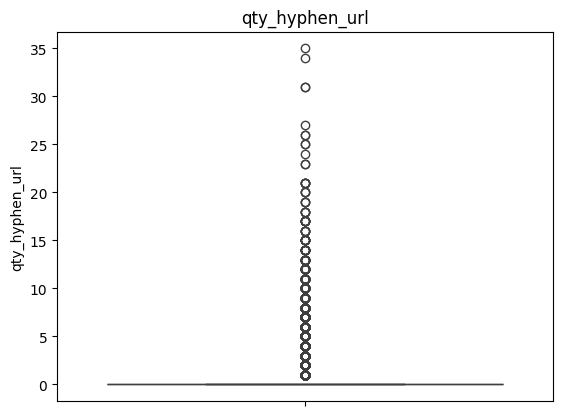

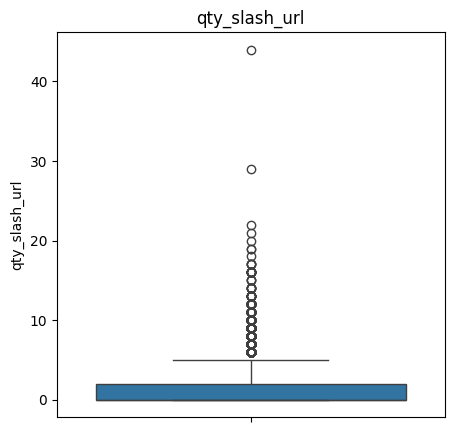

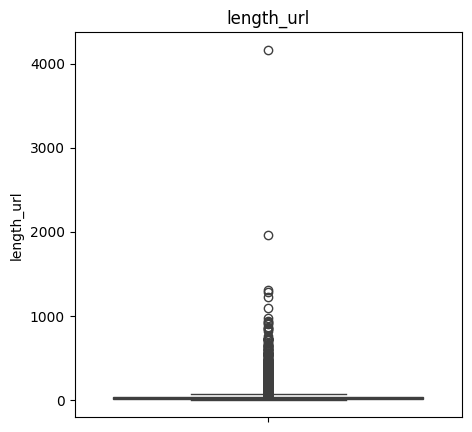

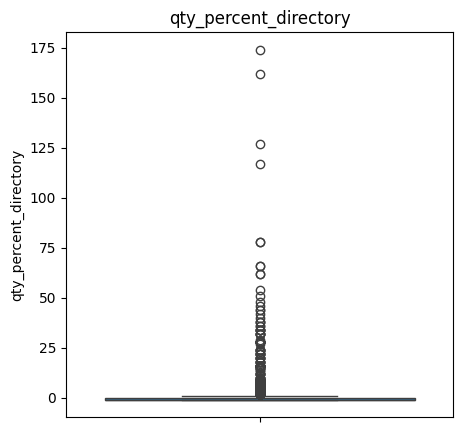

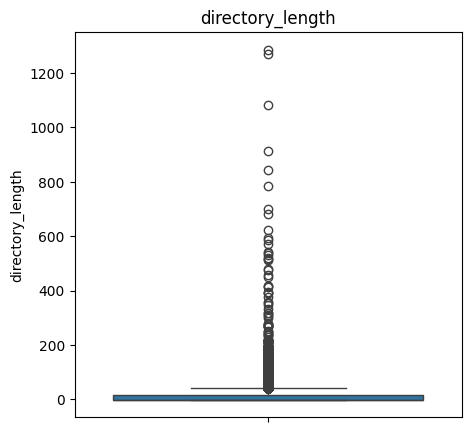

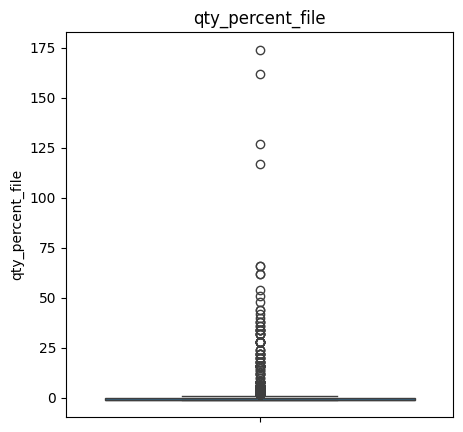

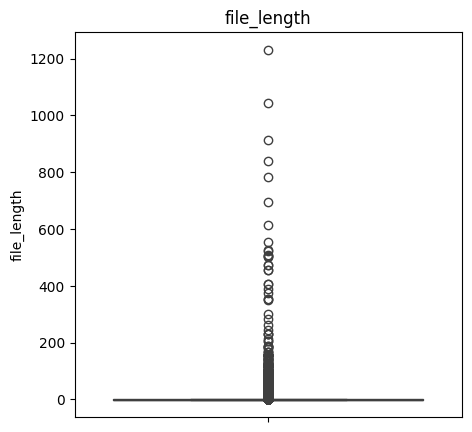

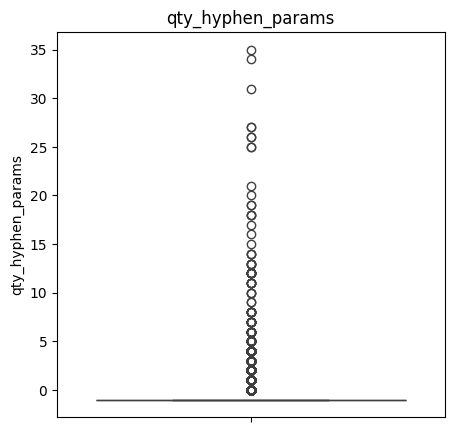

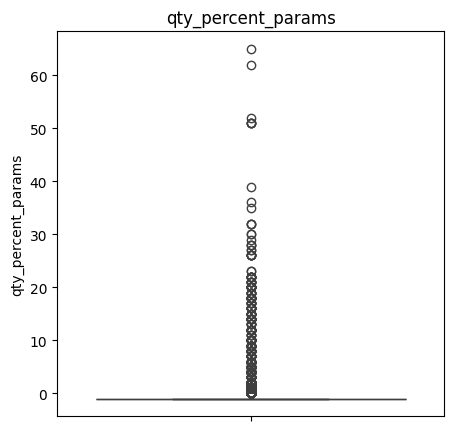

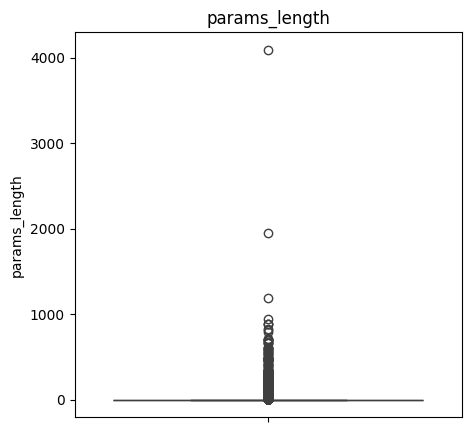

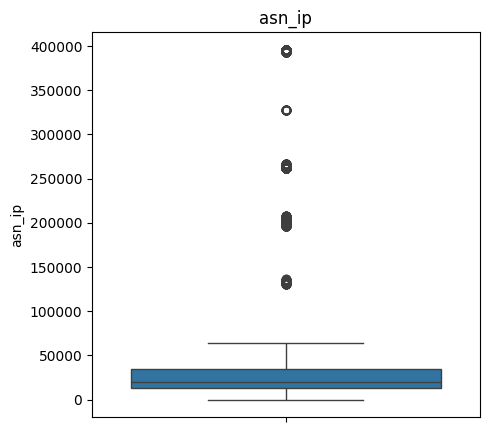

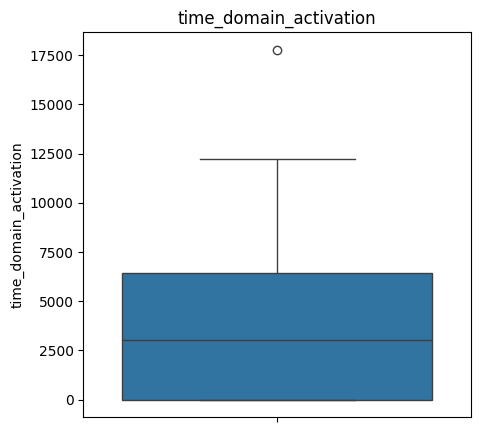

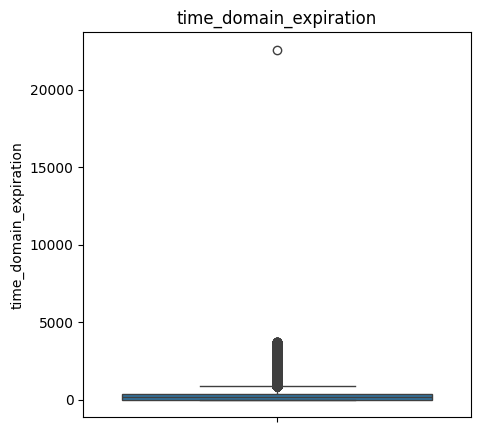

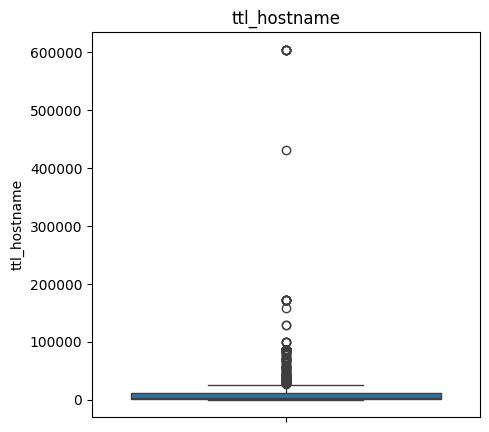

<Figure size 500x500 with 0 Axes>

In [309]:
##outlier detection for contunious features
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\2062669926.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


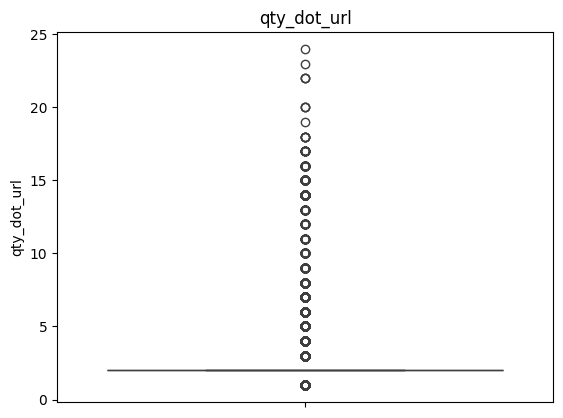

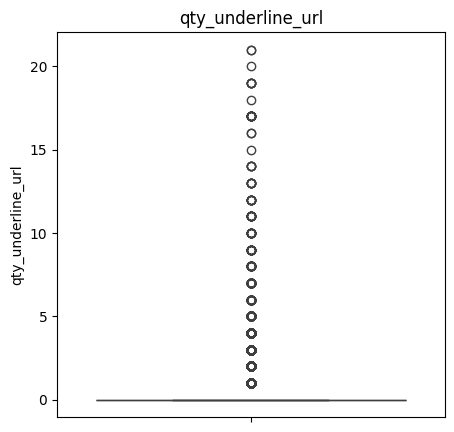

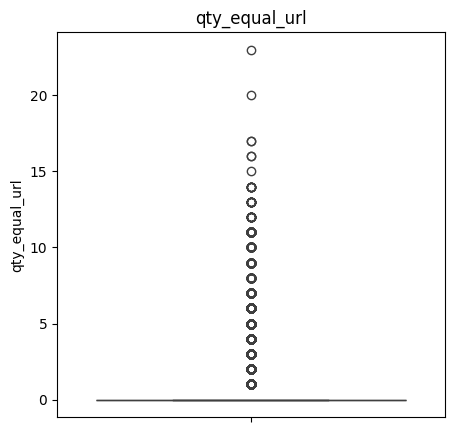

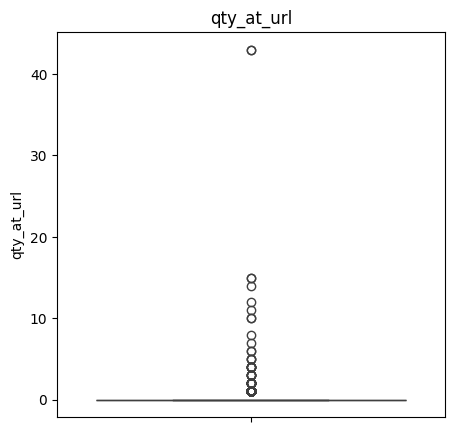

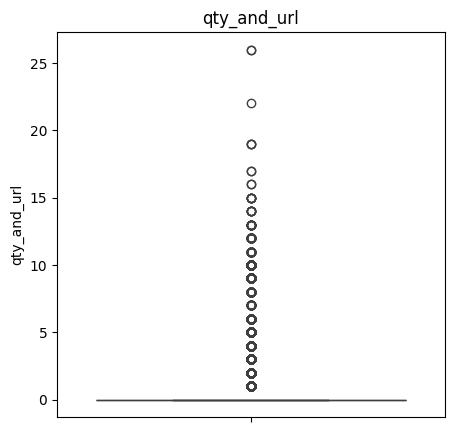

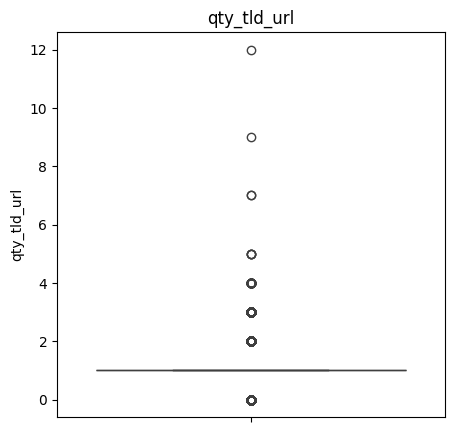

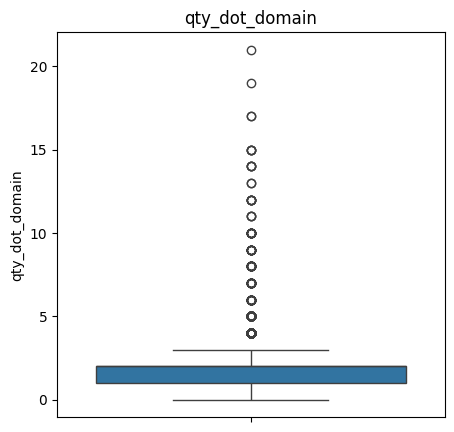

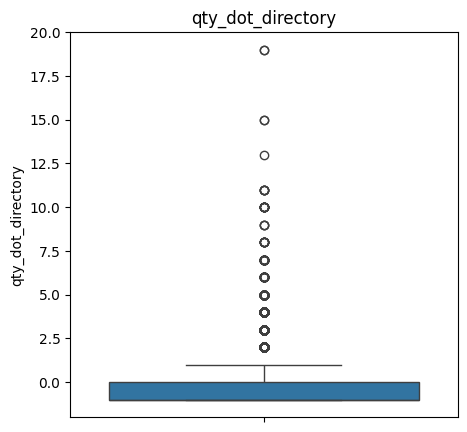

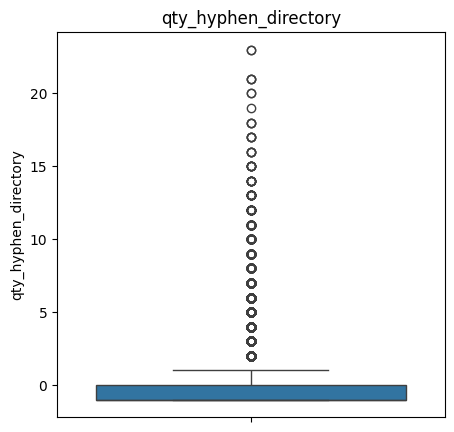

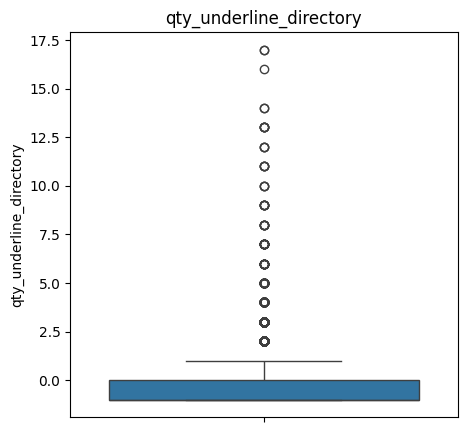

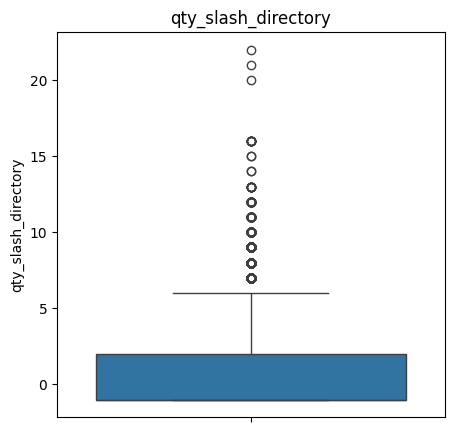

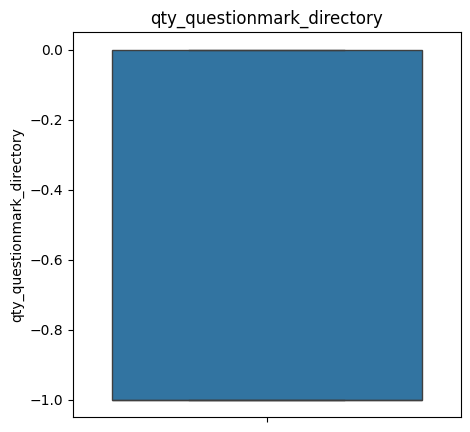

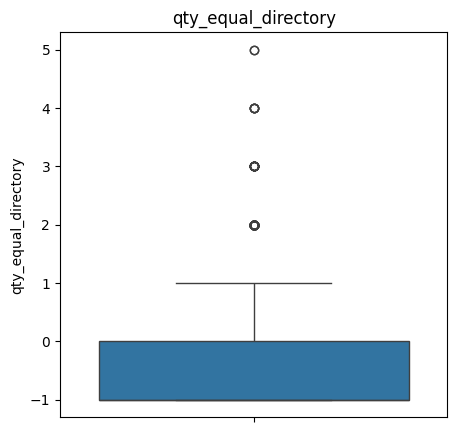

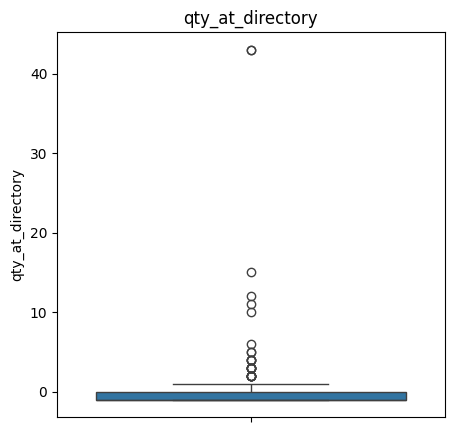

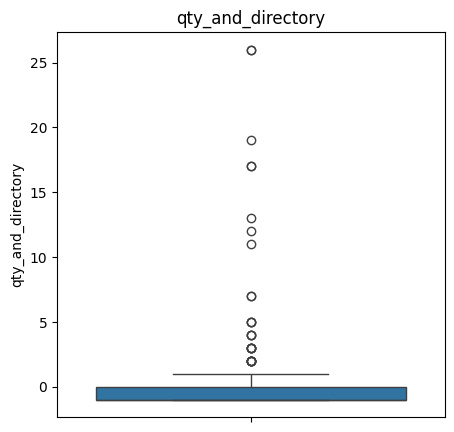

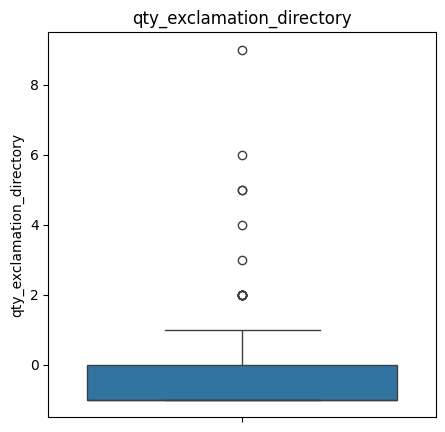

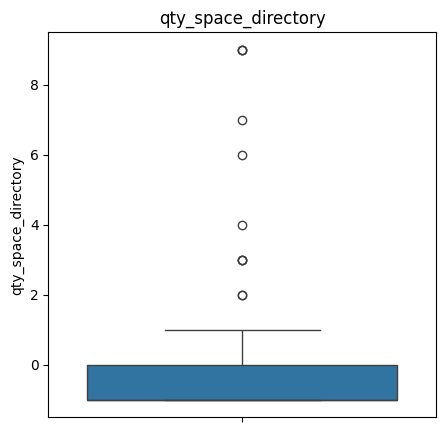

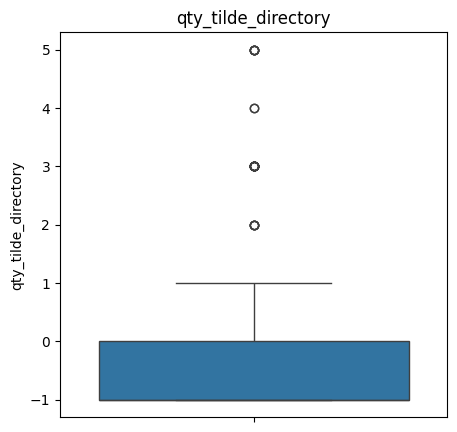

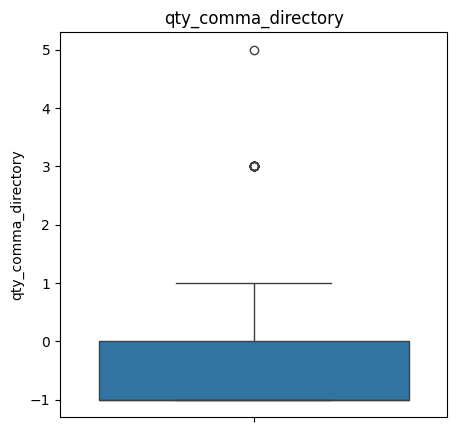

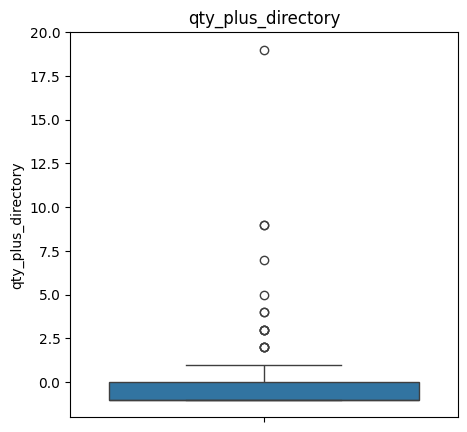

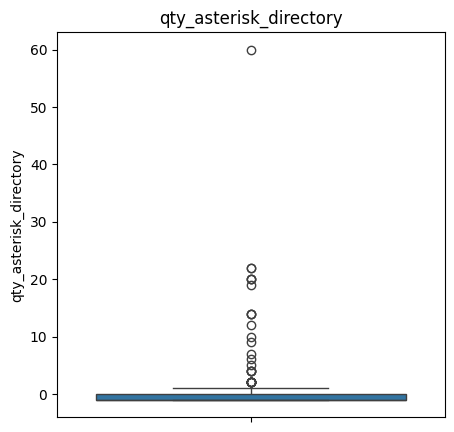

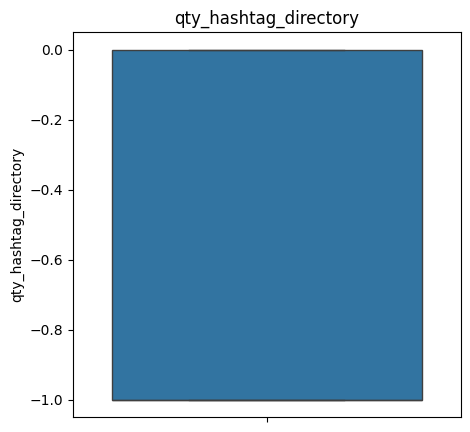

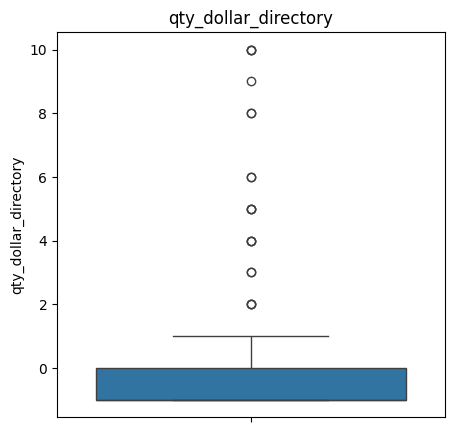

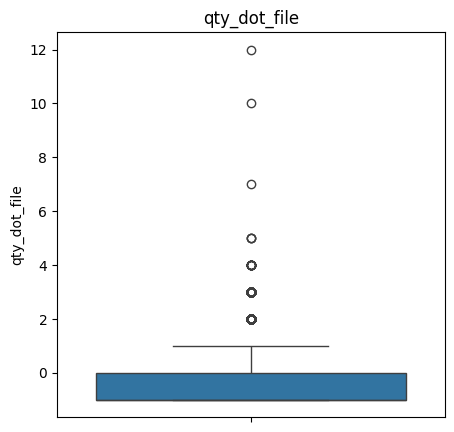

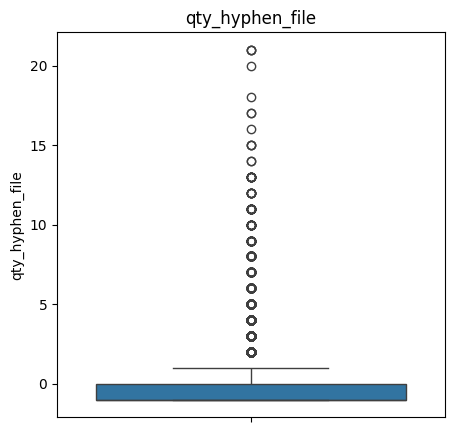

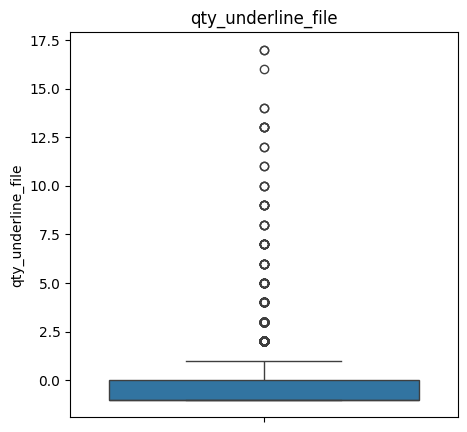

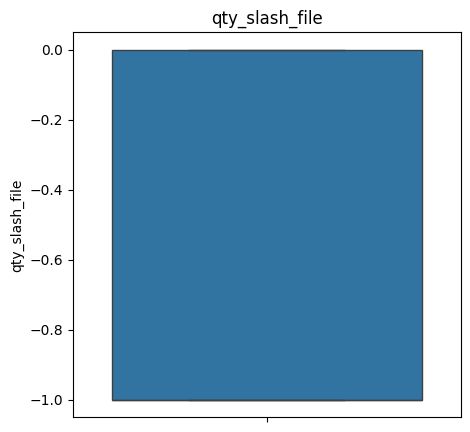

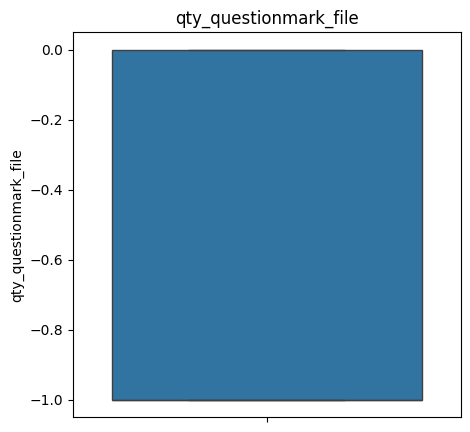

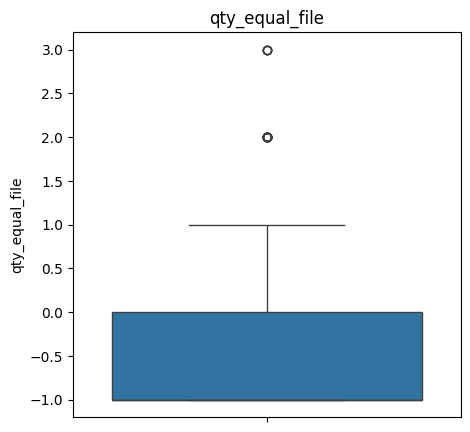

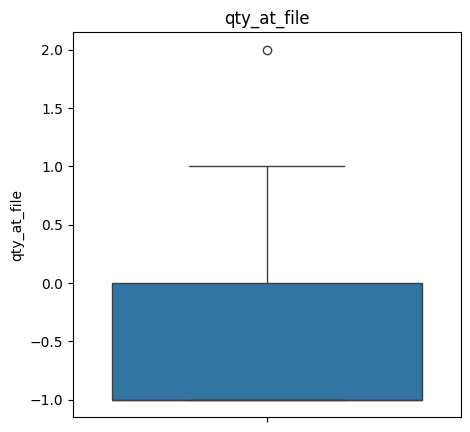

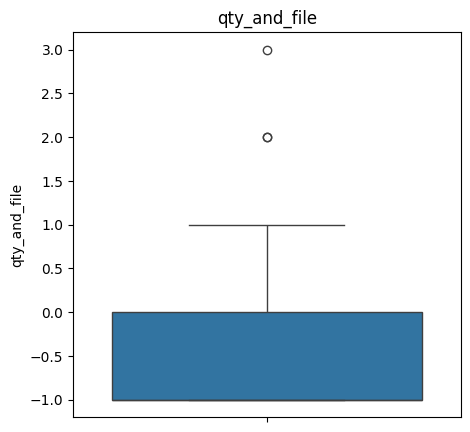

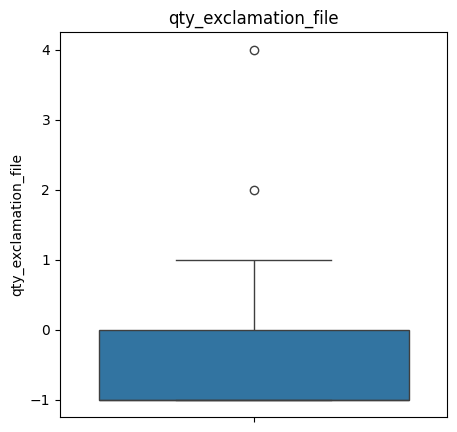

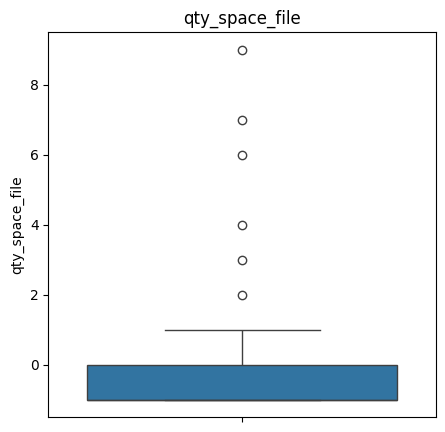

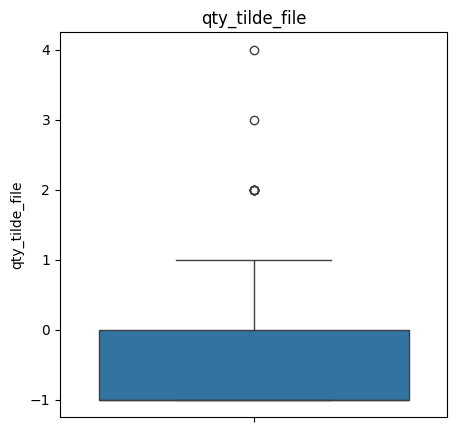

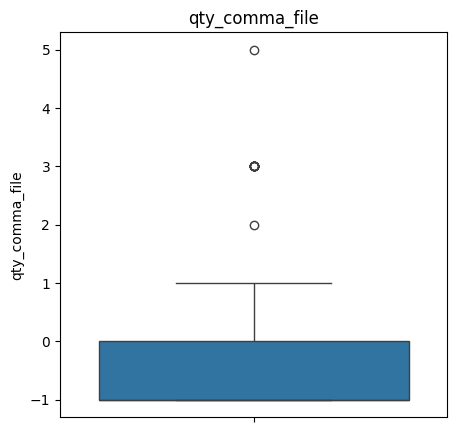

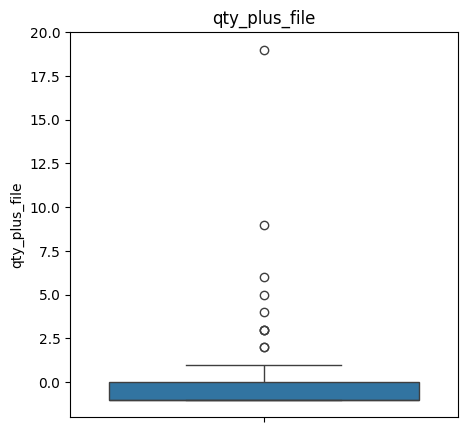

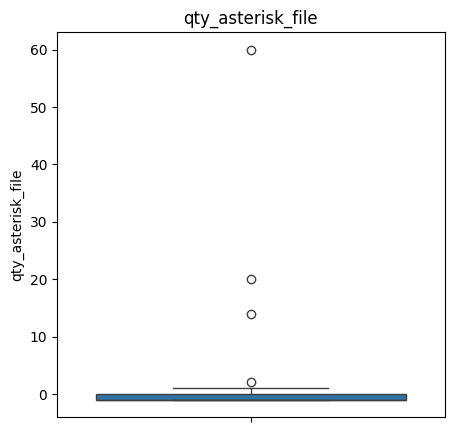

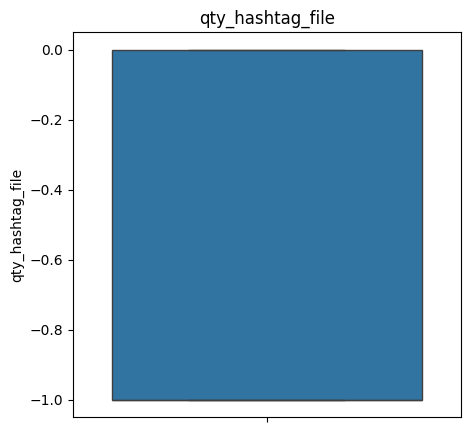

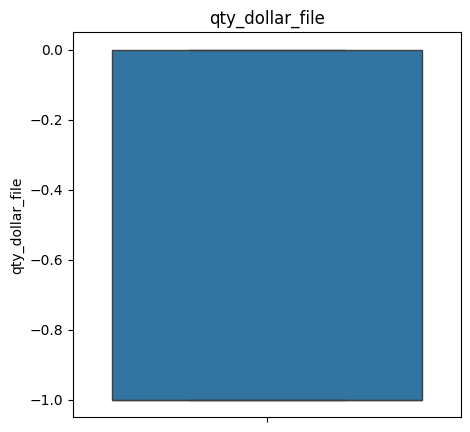

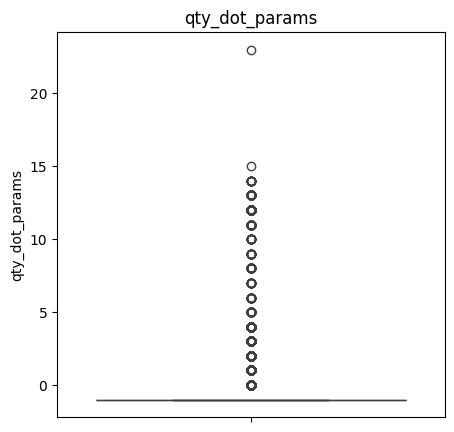

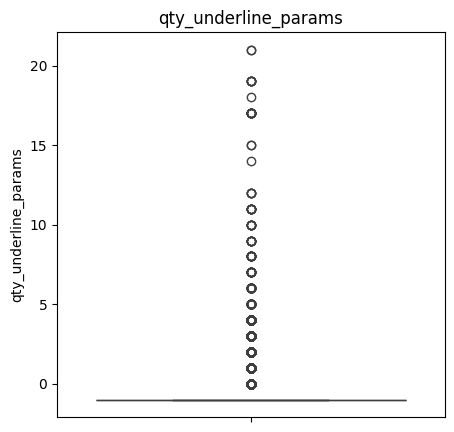

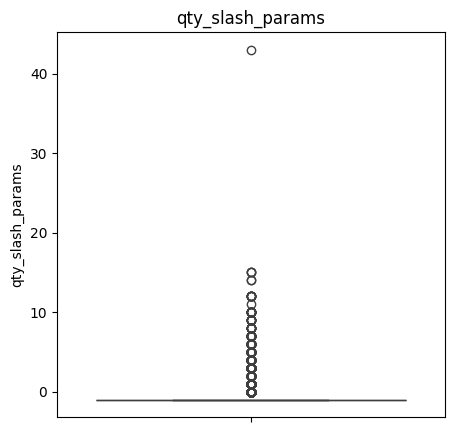

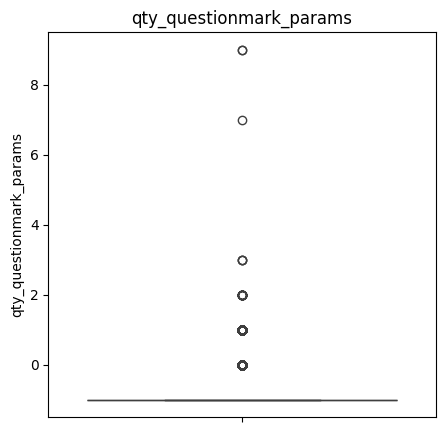

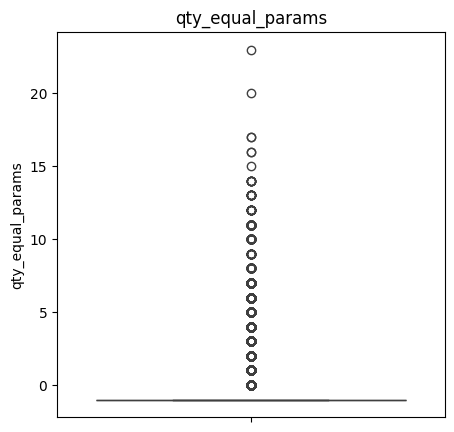

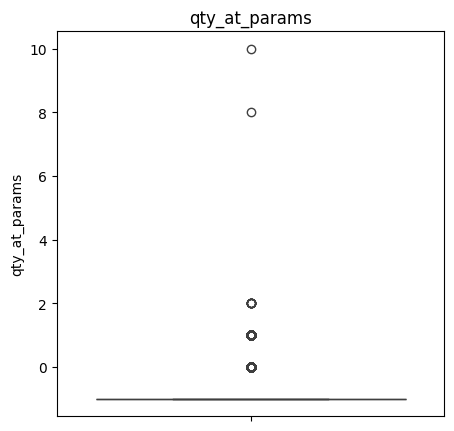

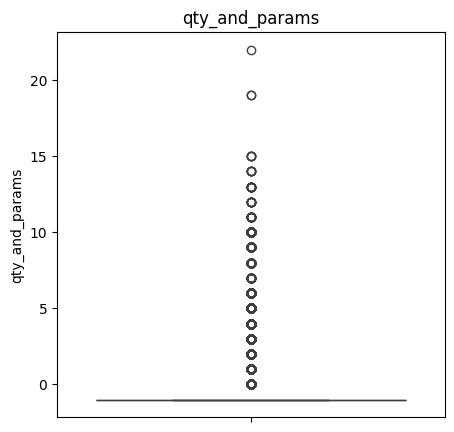

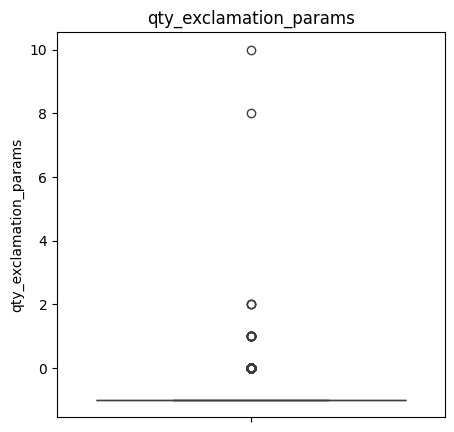

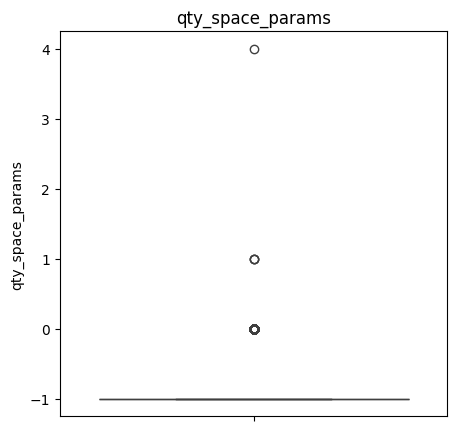

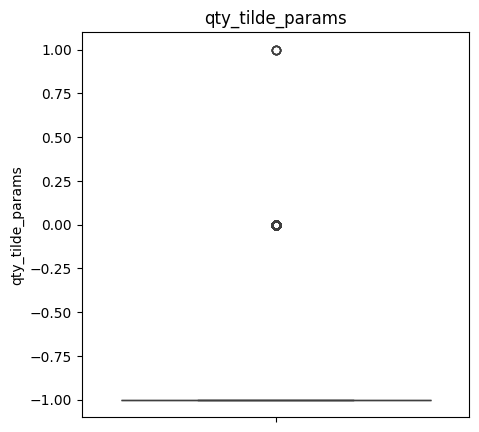

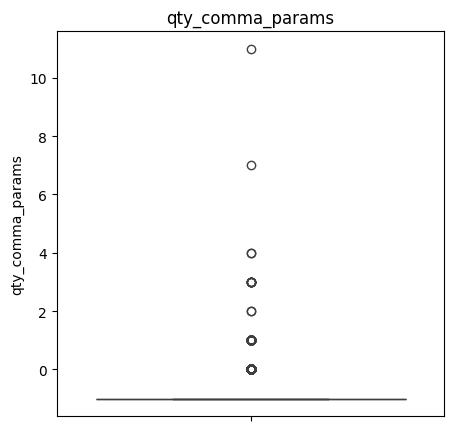

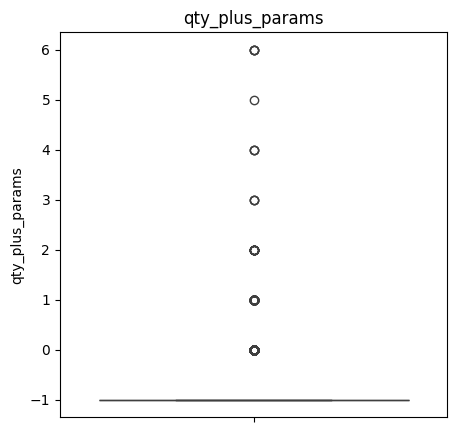

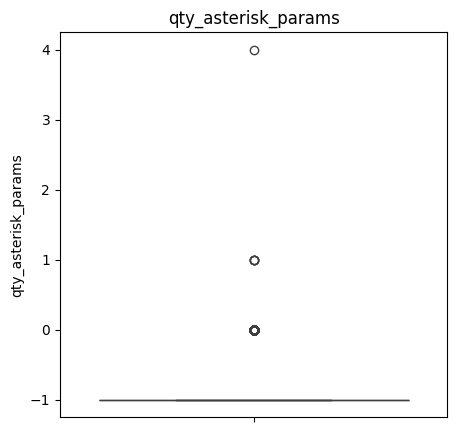

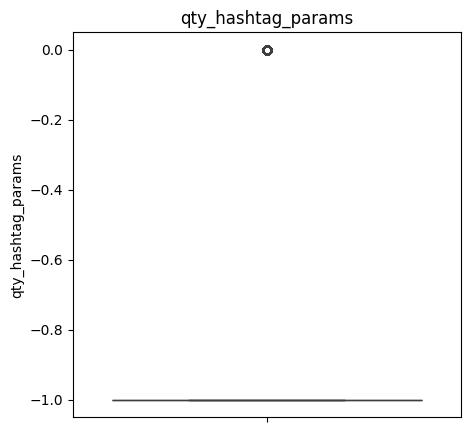

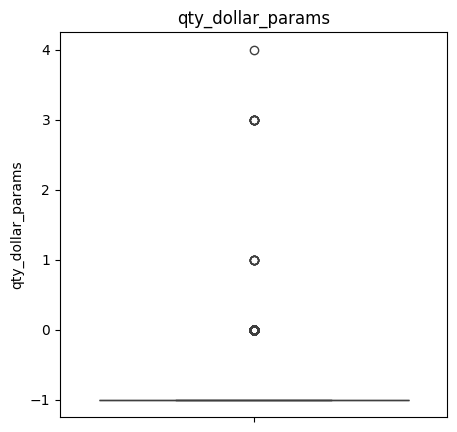

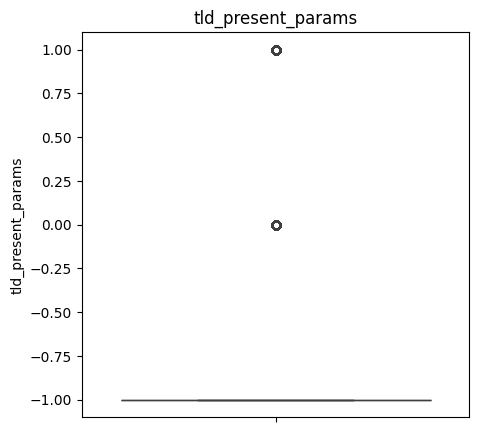

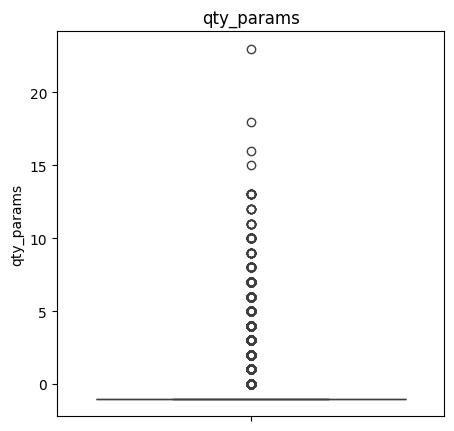

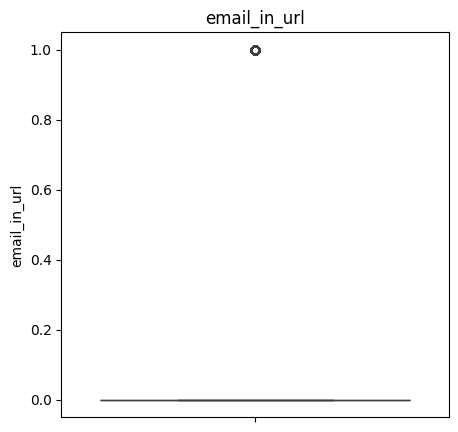

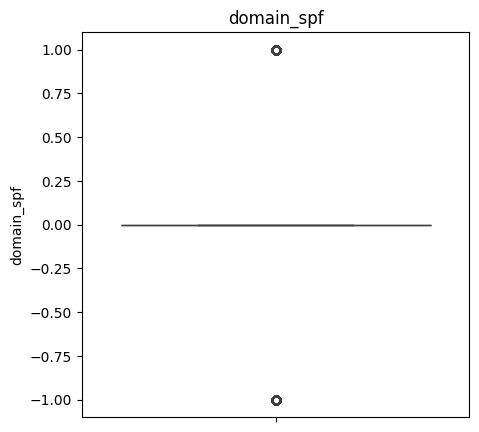

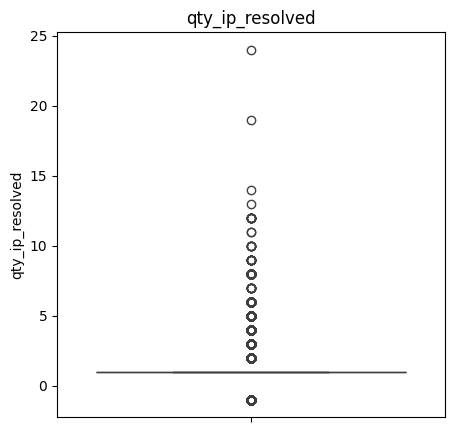

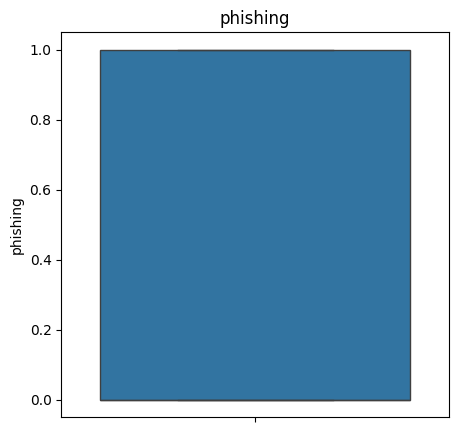

<Figure size 500x500 with 0 Axes>

In [256]:
##outliers detection for district features
for feature in discrete_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


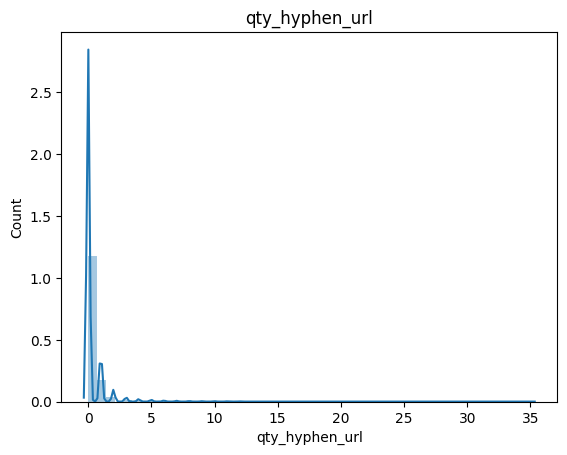

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


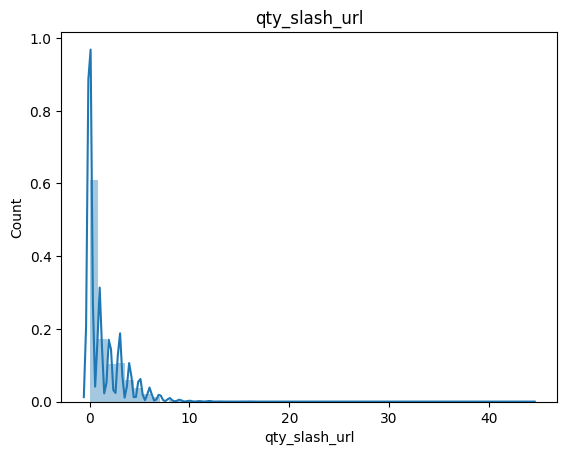

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


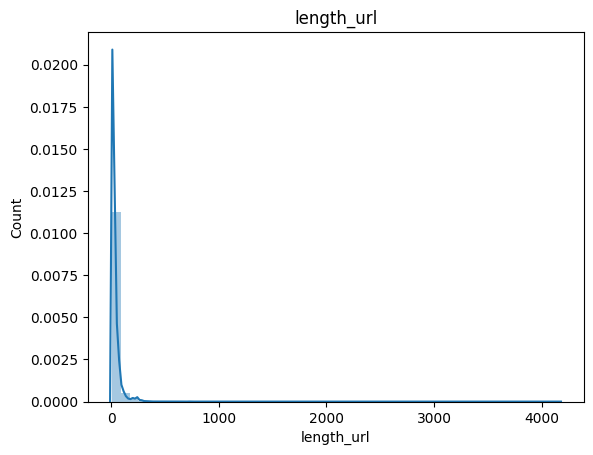

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


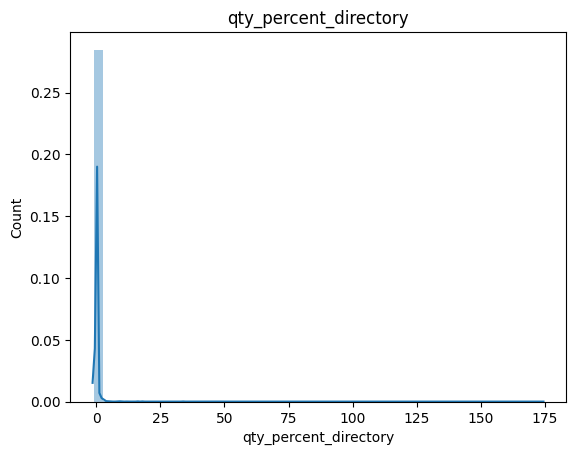

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


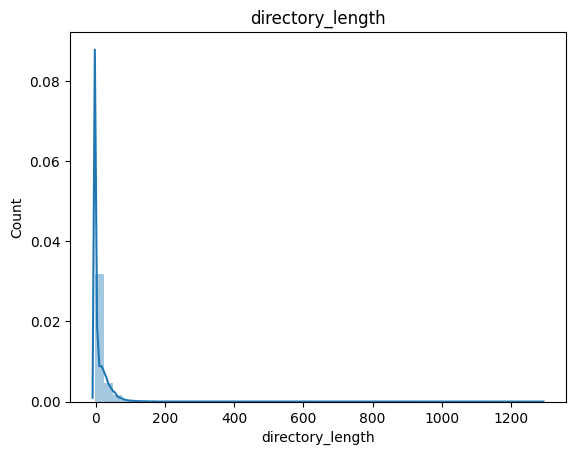

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


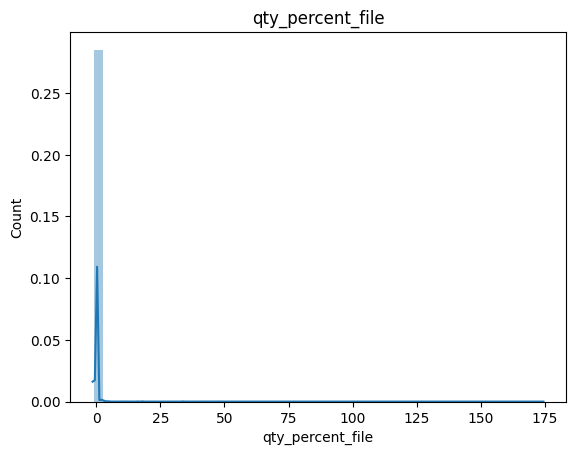

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


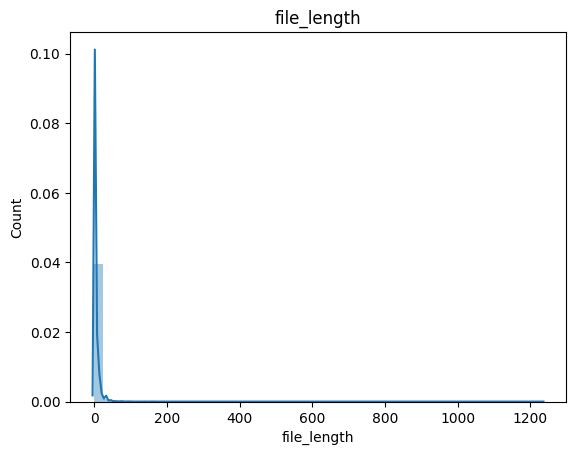

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


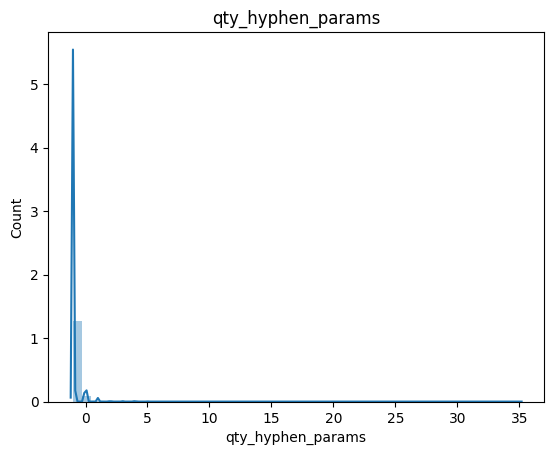

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


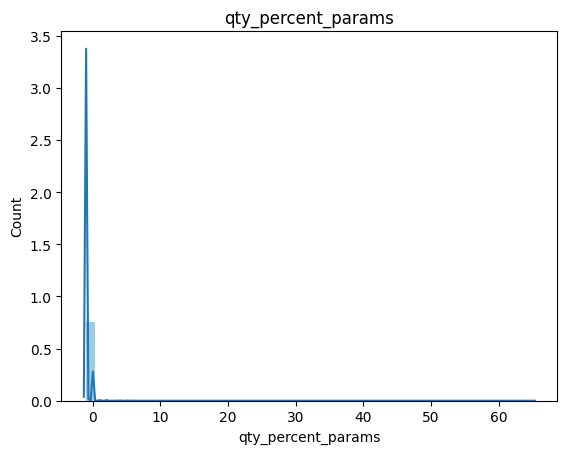

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


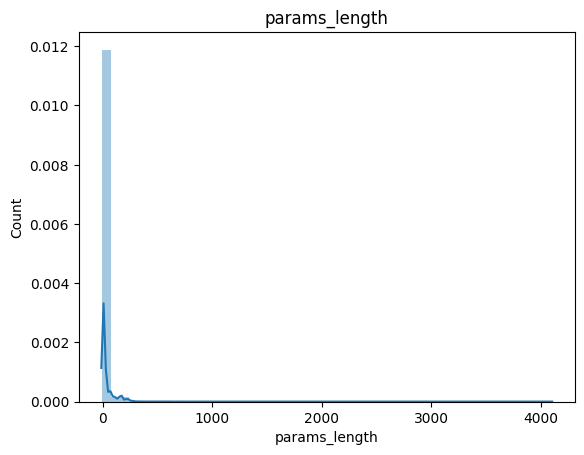

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


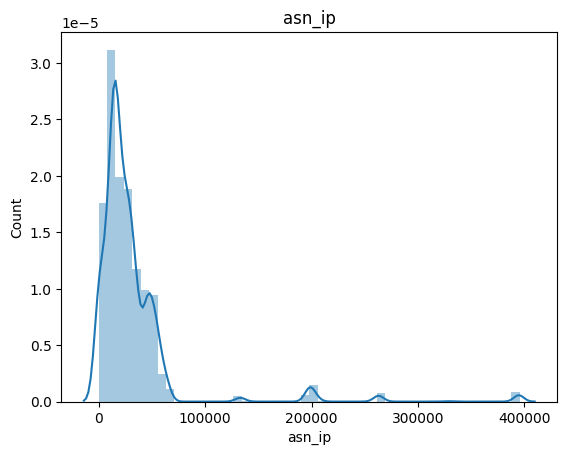

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


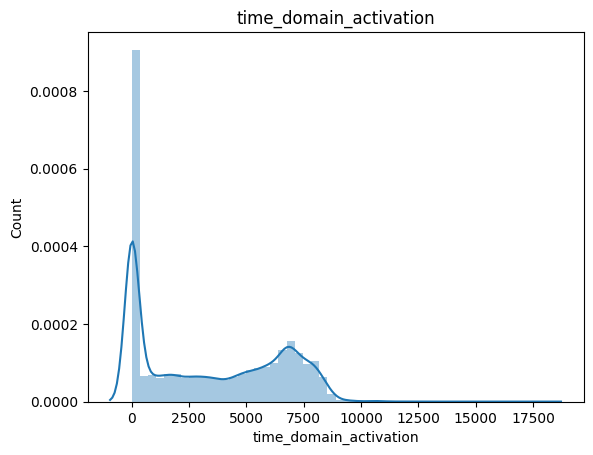

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


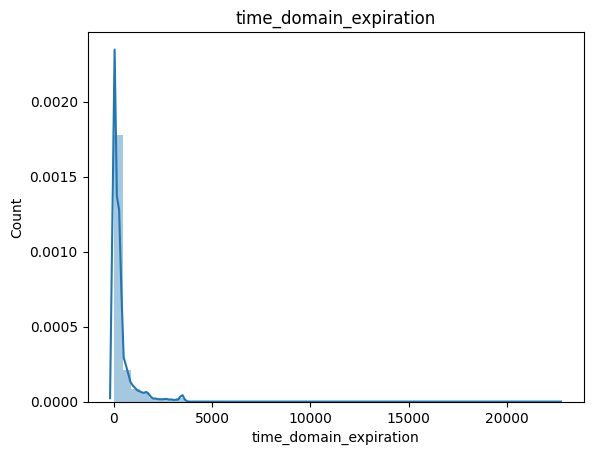

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\841901192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


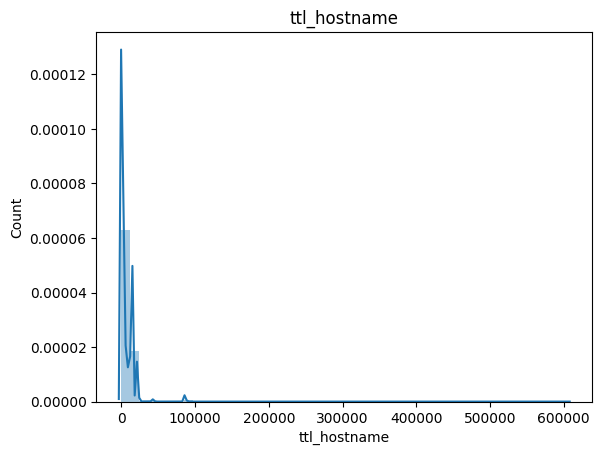

<Figure size 500x500 with 0 Axes>

In [257]:
## distribution of continous features
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(5,5))
    plt.show()

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


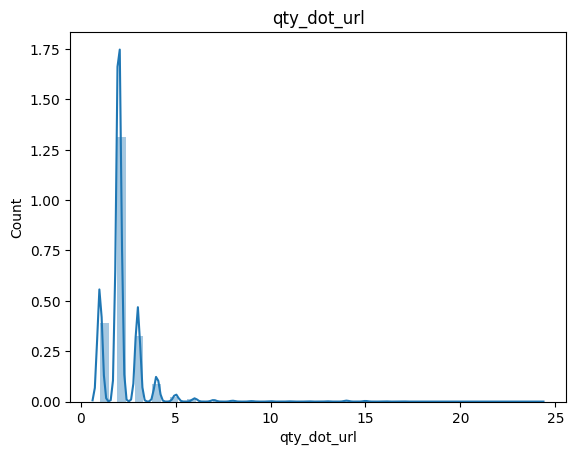

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


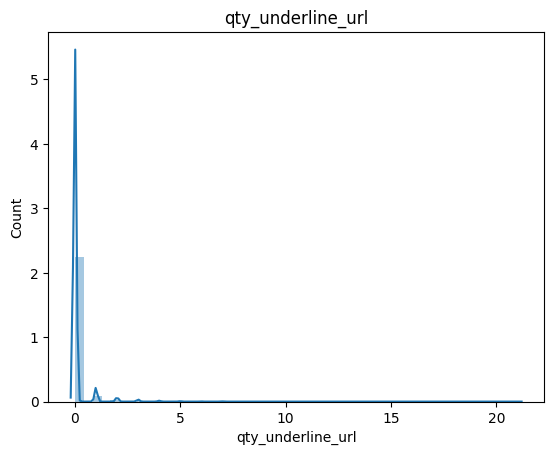

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


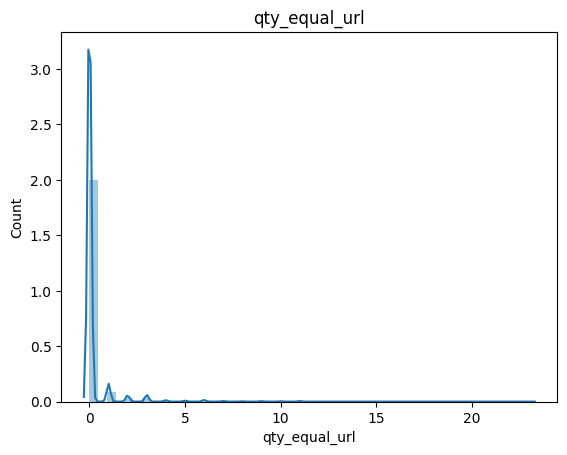

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


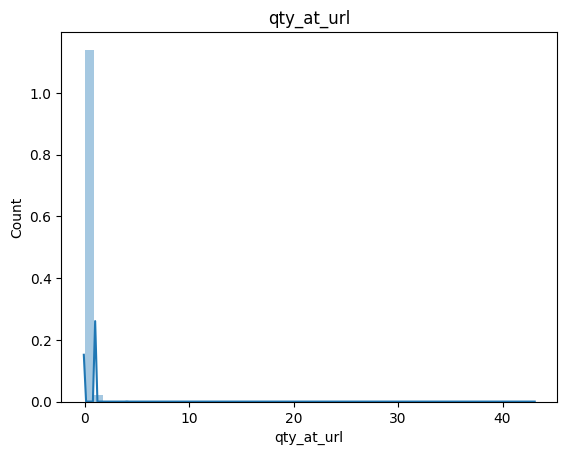

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


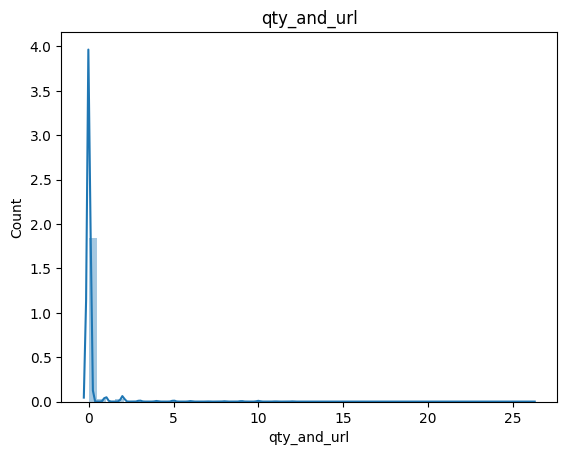

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


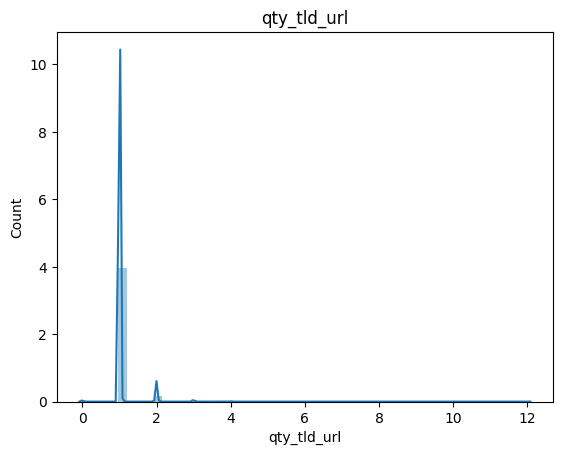

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


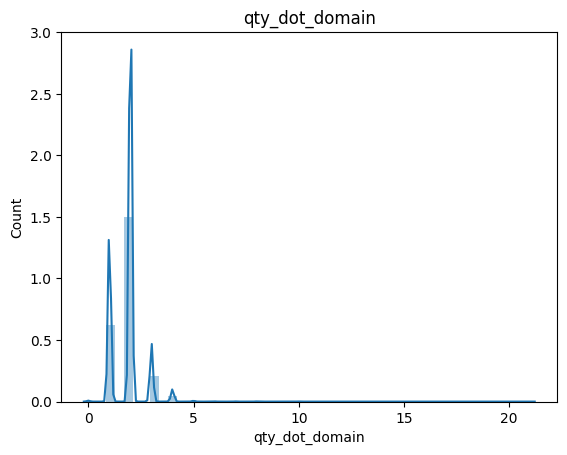

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


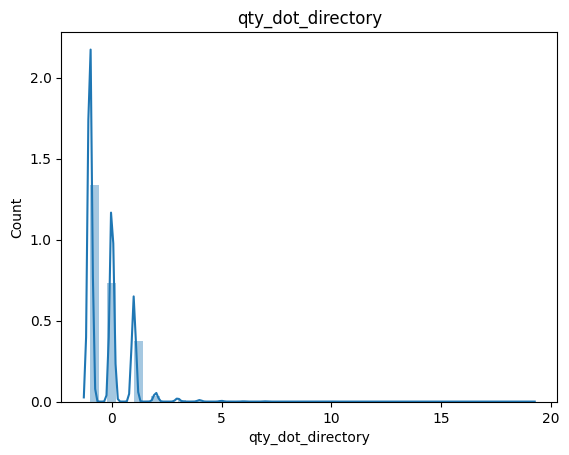

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


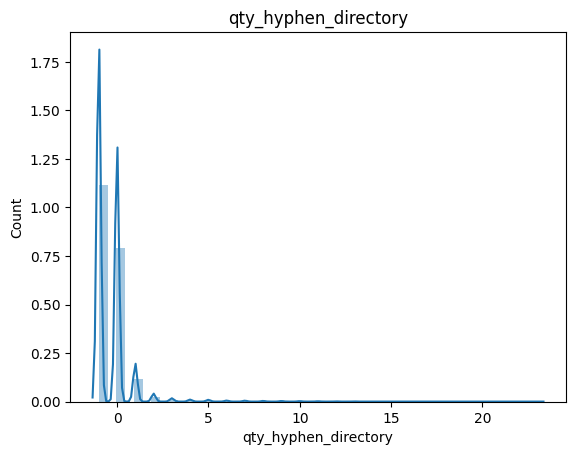

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


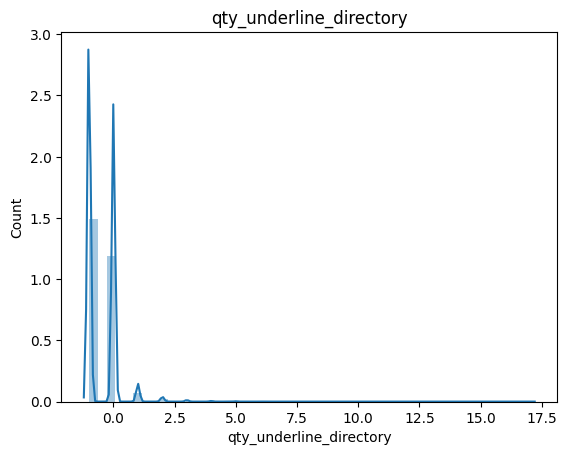

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


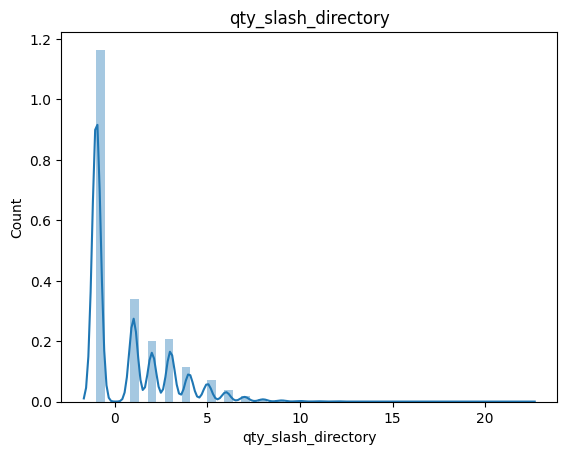

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


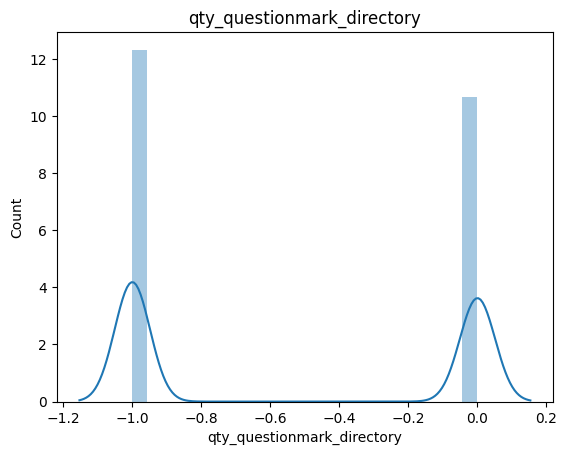

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


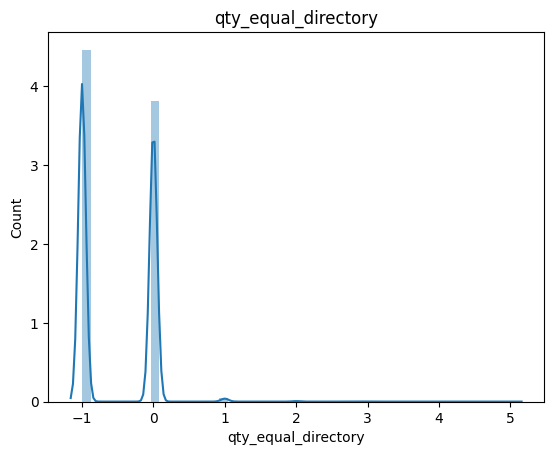

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


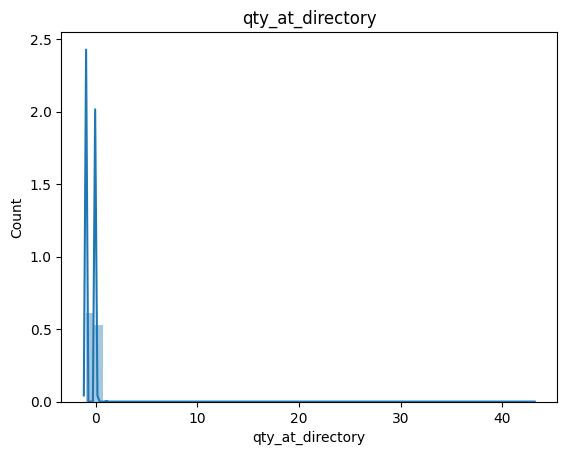

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


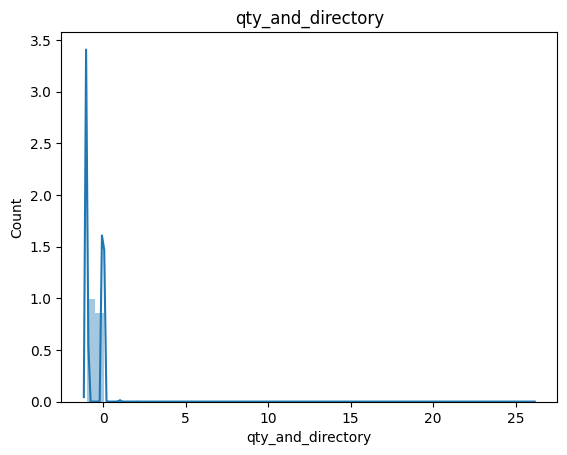

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


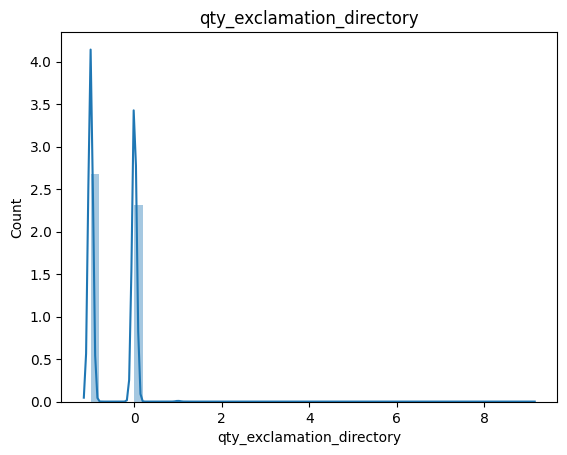

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


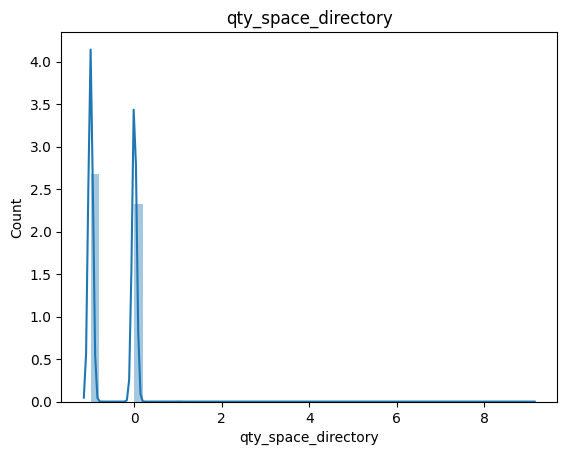

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


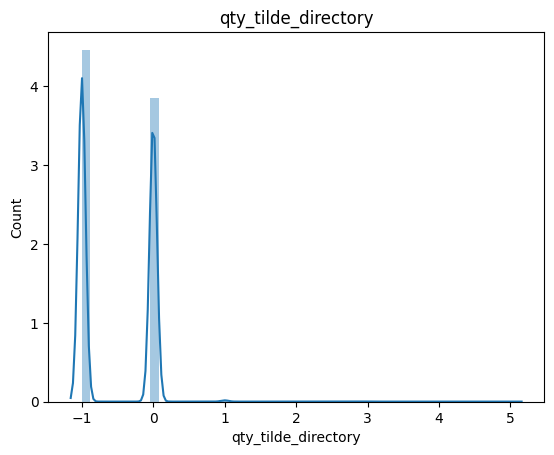

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


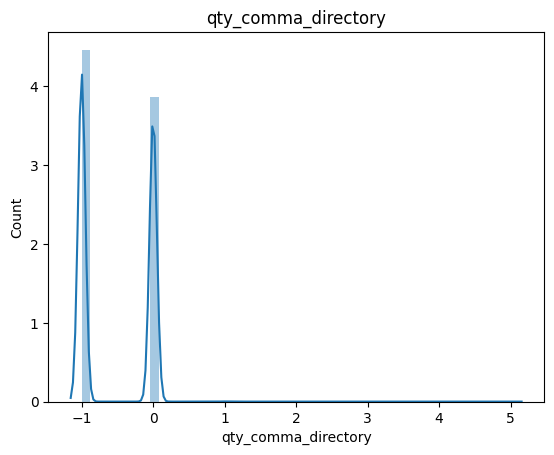

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


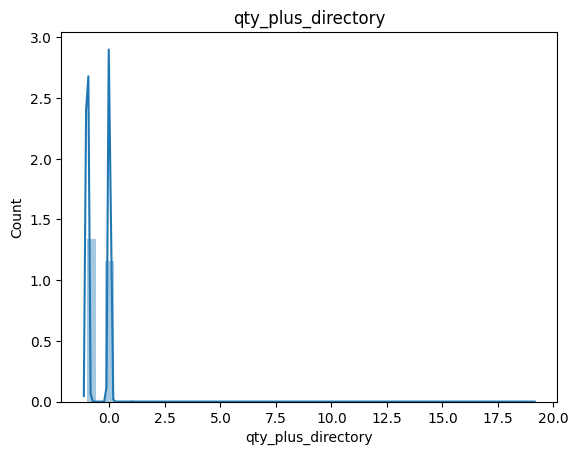

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


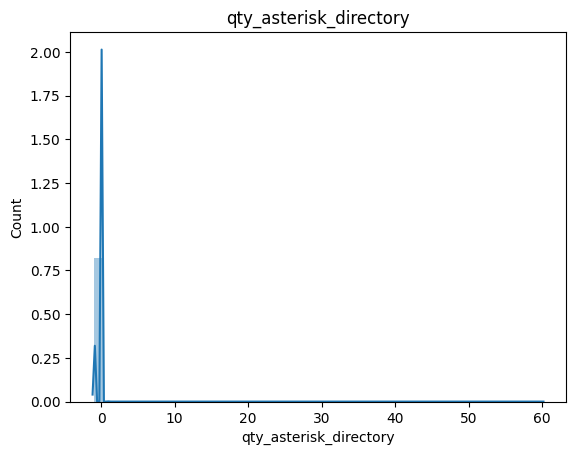

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


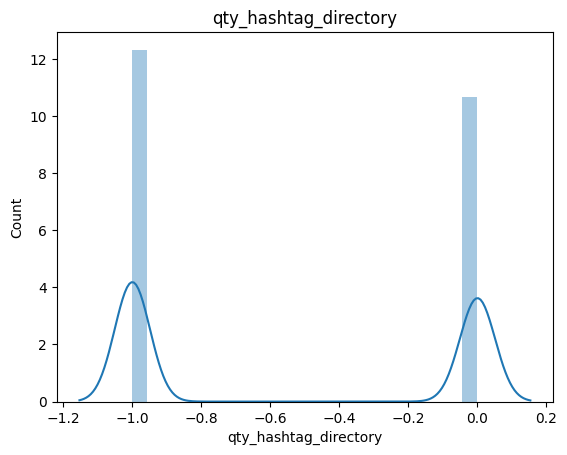

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


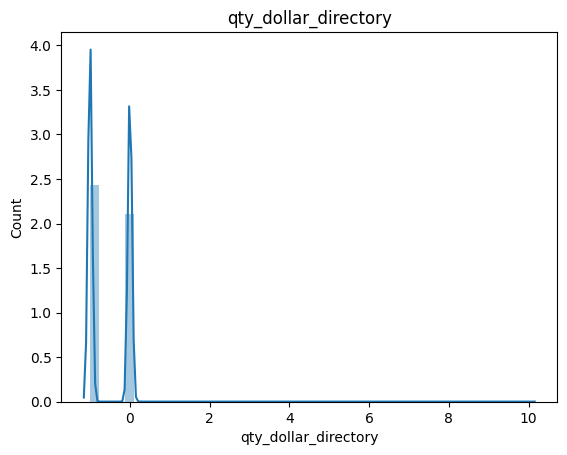

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


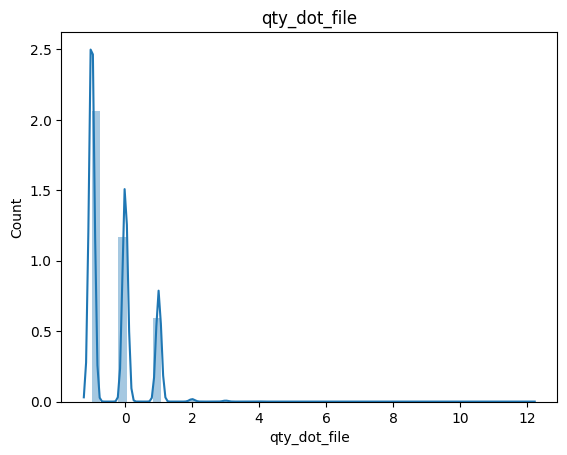

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


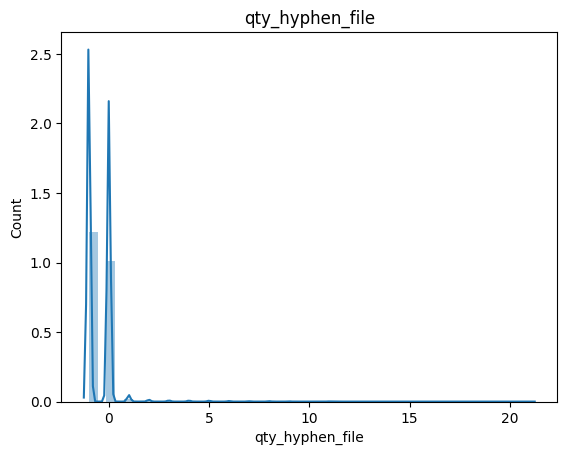

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


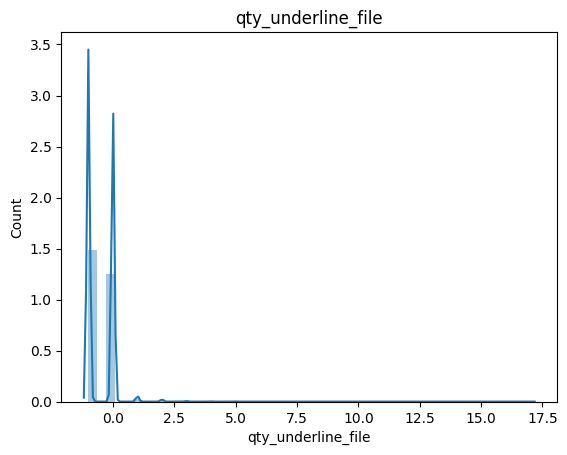

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


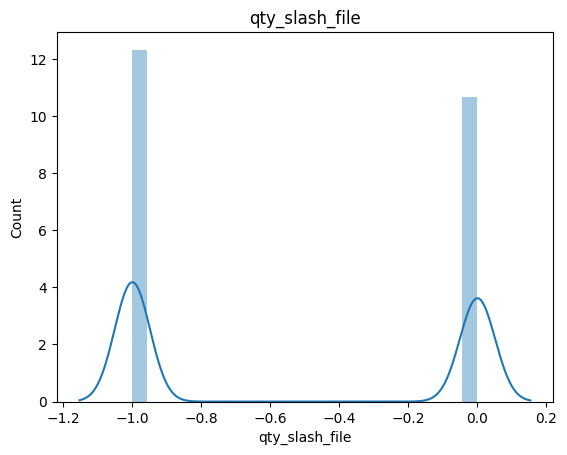

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


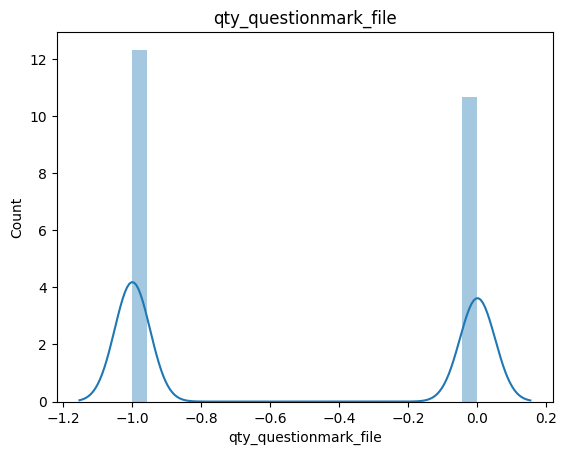

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


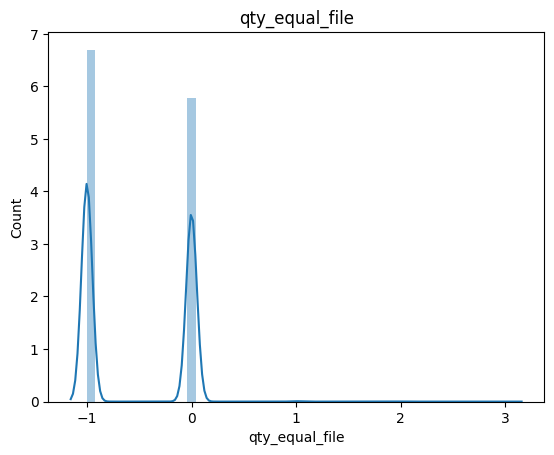

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


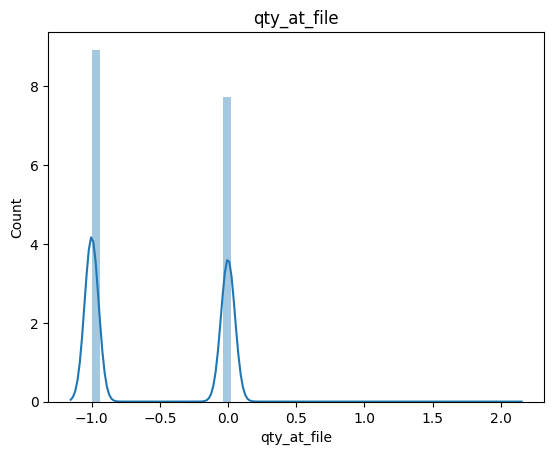

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


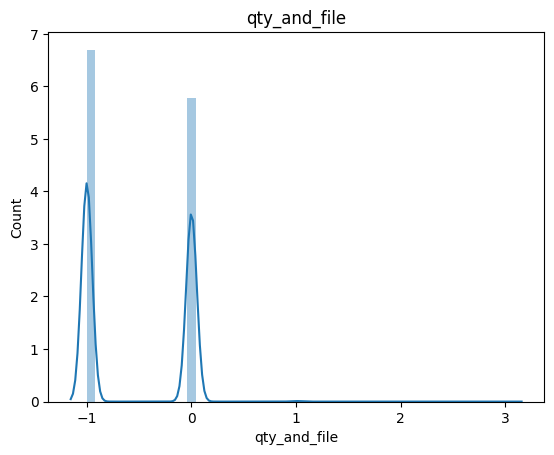

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


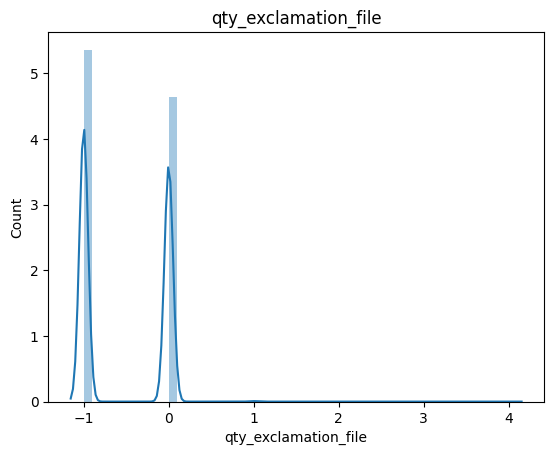

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


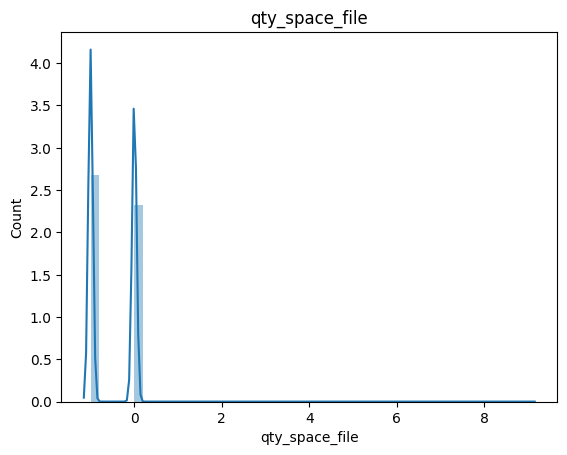

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


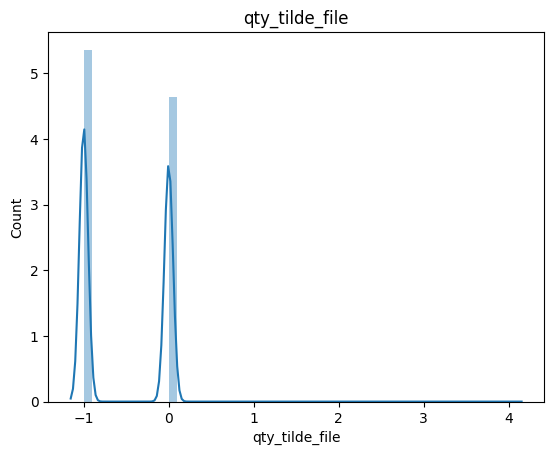

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


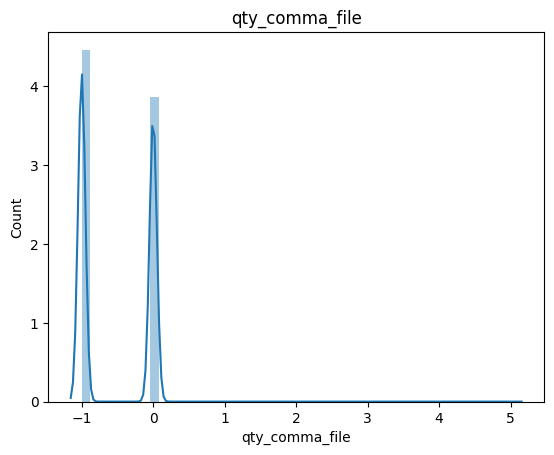

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


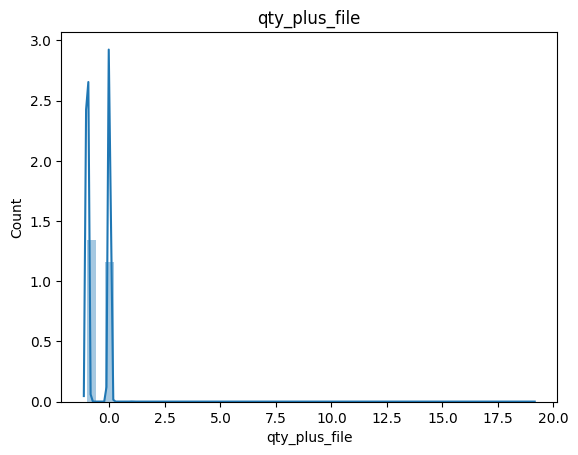

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


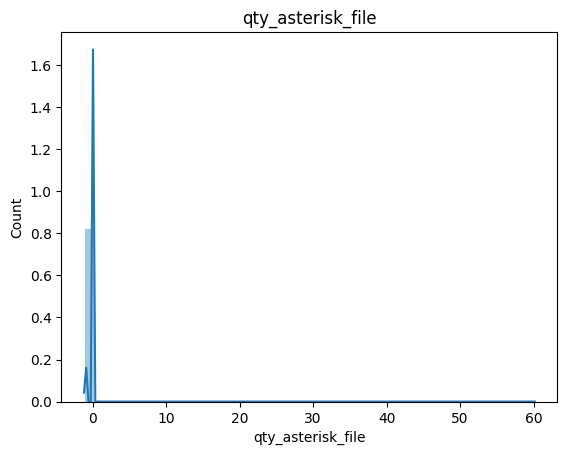

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


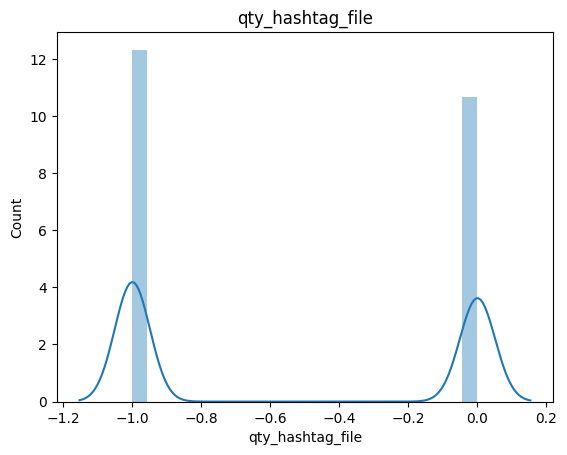

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


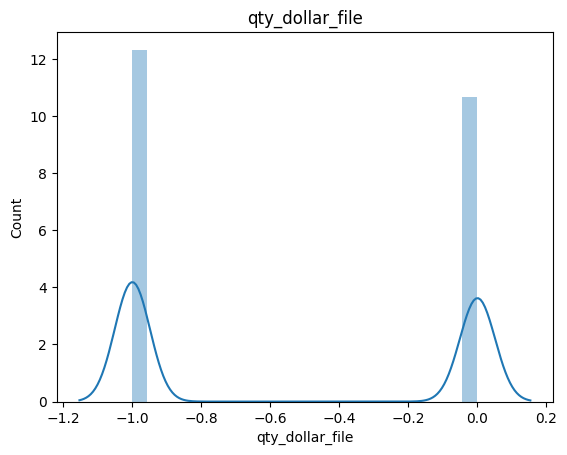

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


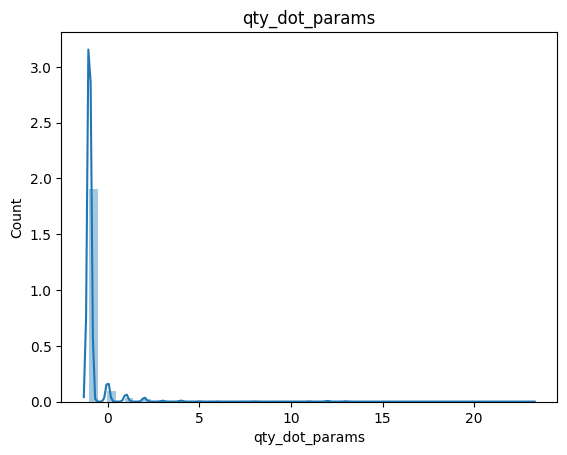

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


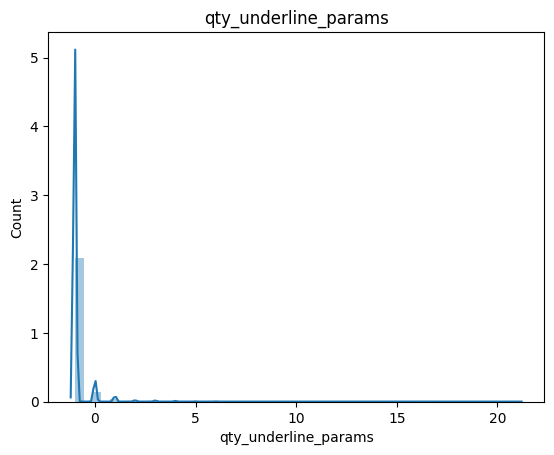

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


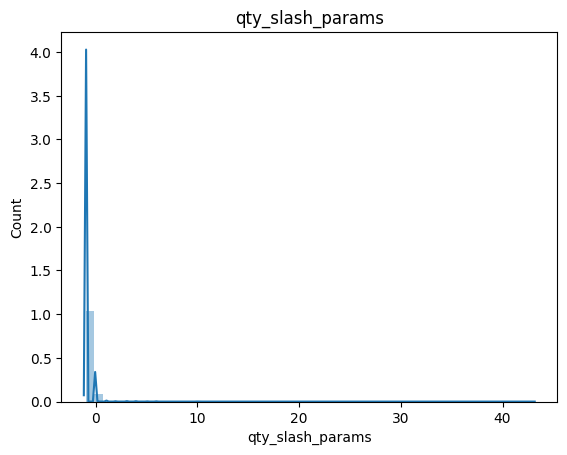

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


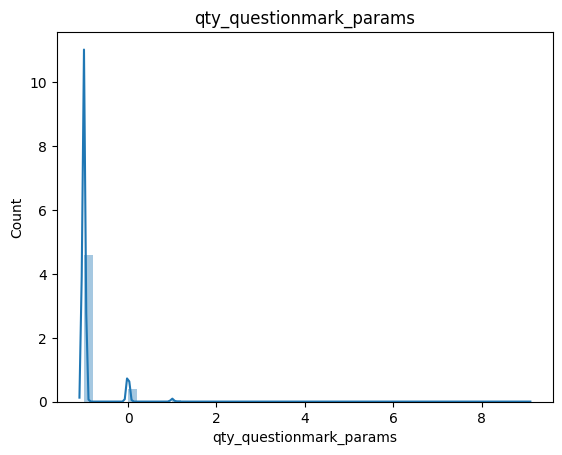

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


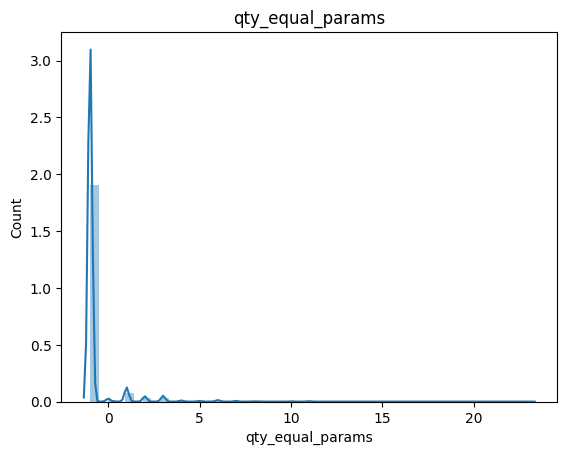

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


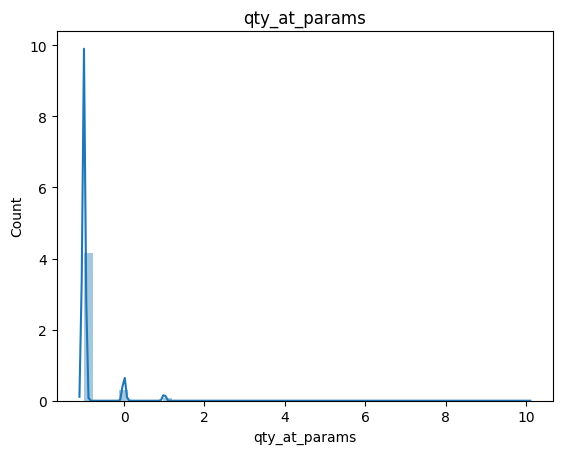

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


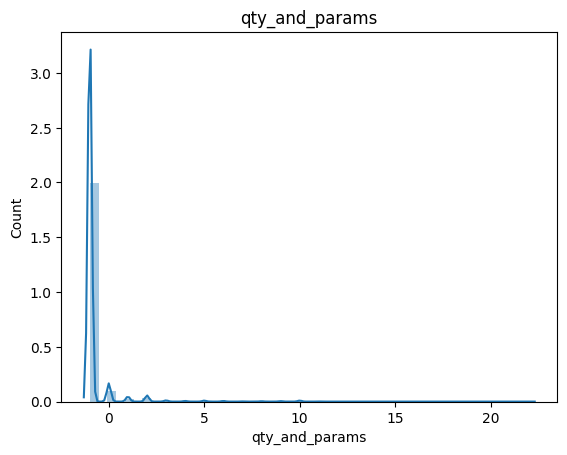

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


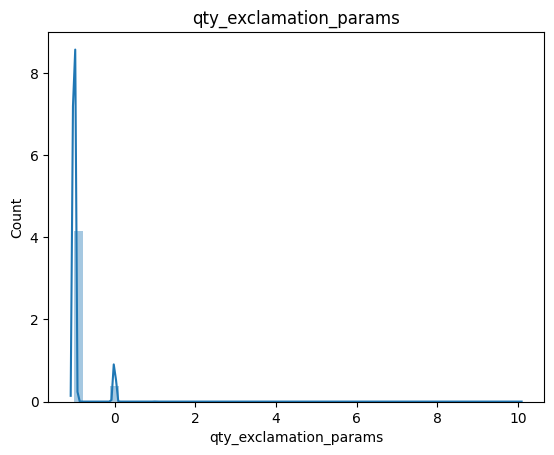

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


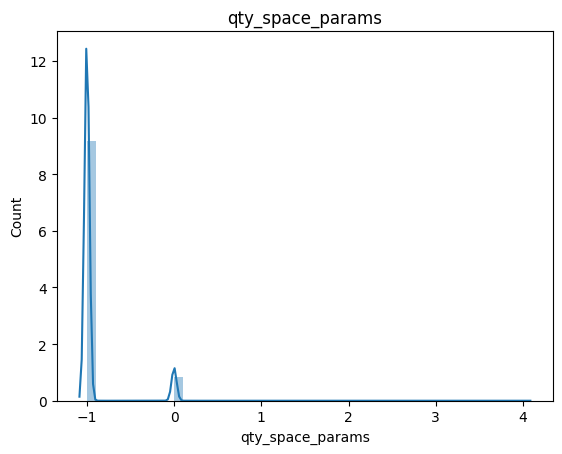

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


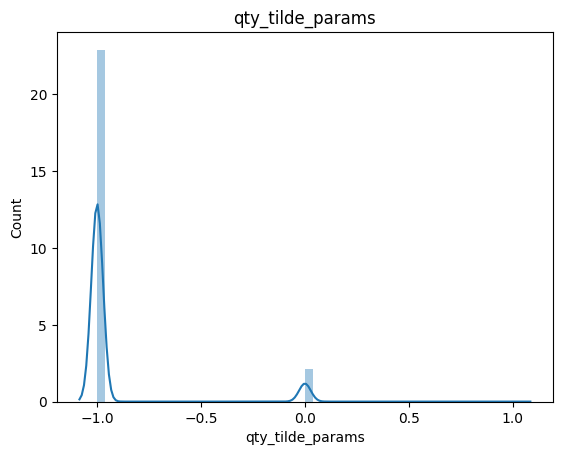

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


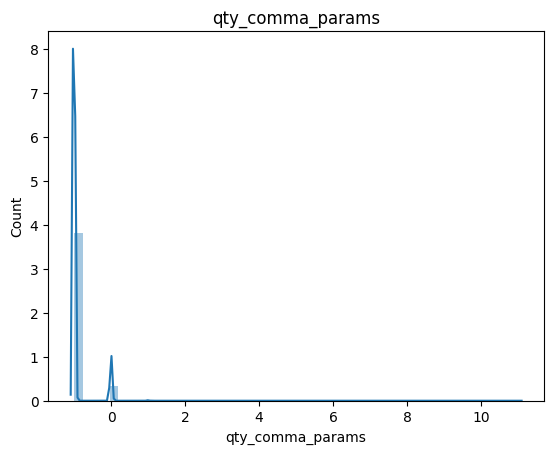

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


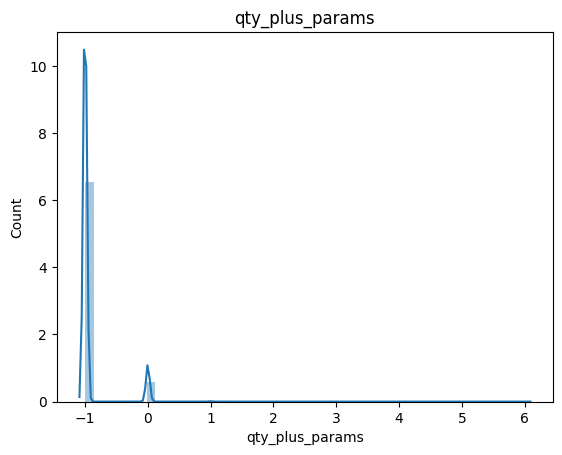

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


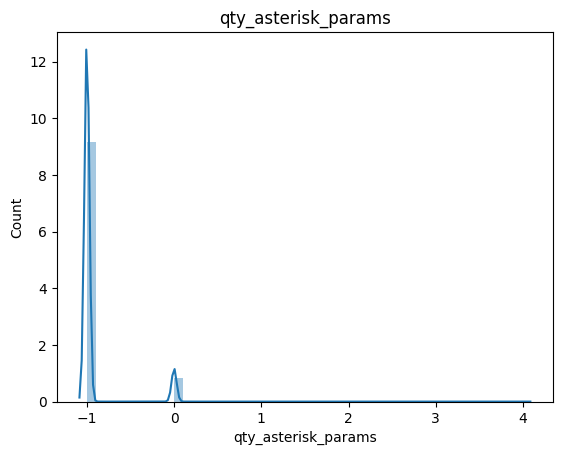

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


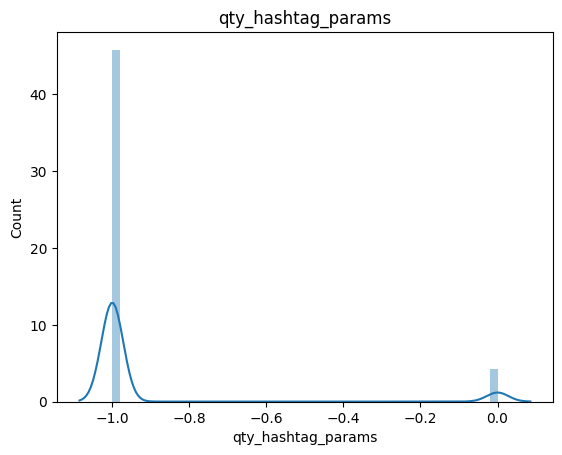

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


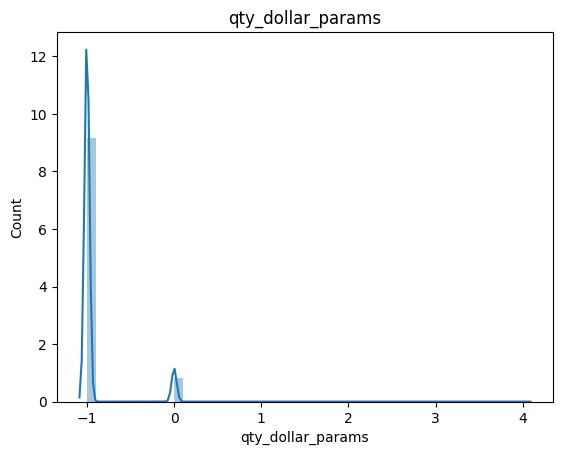

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


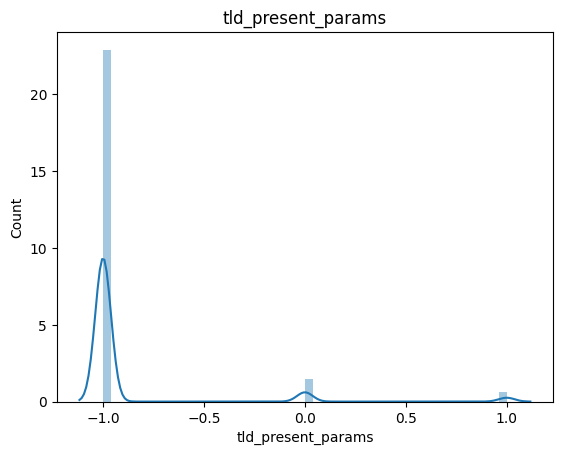

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


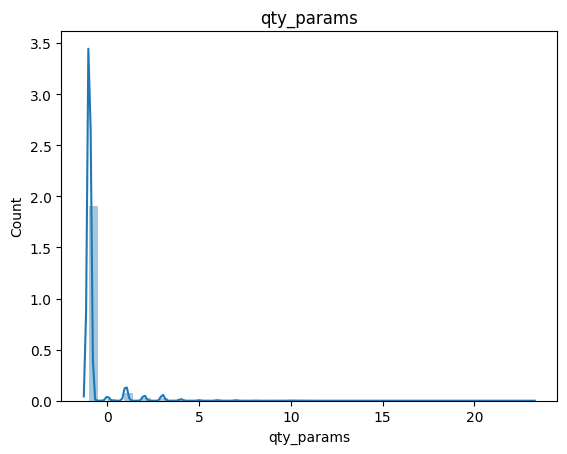

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


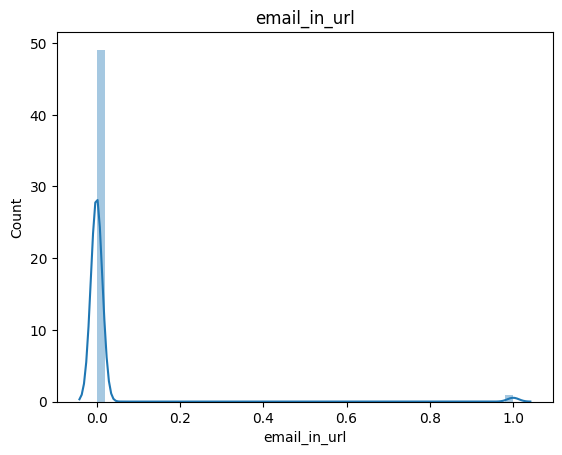

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


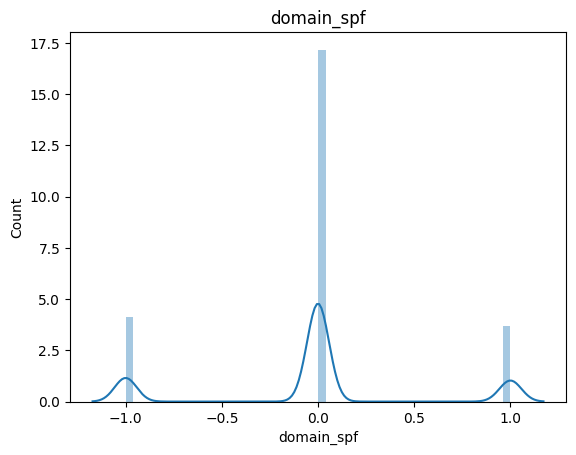

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


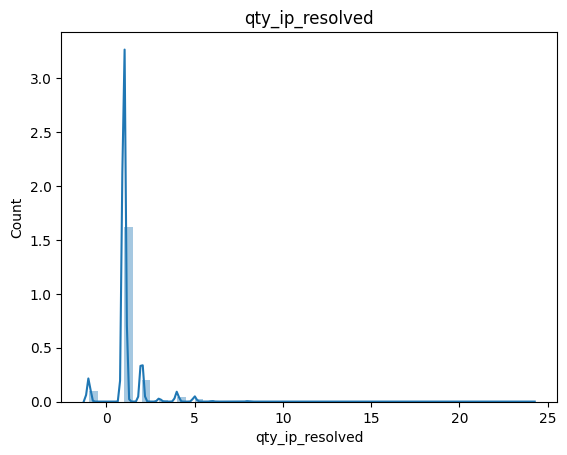

<Figure size 500x500 with 0 Axes>

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\3539470020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


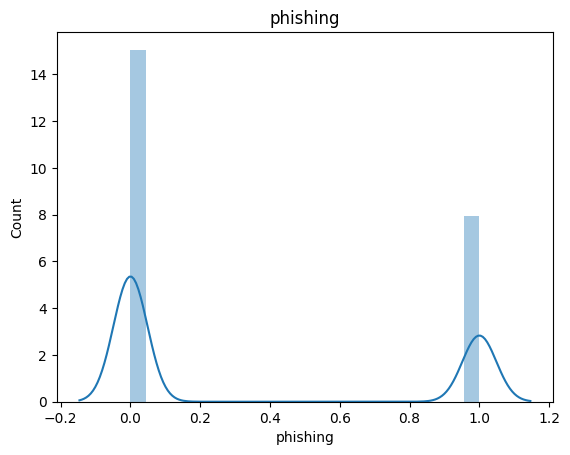

<Figure size 500x500 with 0 Axes>

In [258]:
for feature in discrete_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(5,5))
    plt.show()

In [259]:
df['phishing'].value_counts()

phishing
0    58000
1    30647
Name: count, dtype: int64

In [310]:
X=df.drop(labels="phishing",axis=1)
Y=df[["phishing"]]

In [311]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X,Y = sm.fit_resample(X,Y)
df = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)


In [312]:
df['phishing'].value_counts()

phishing
1    58000
0    58000
Name: count, dtype: int64

In [313]:
##handling outliers
for feature in continuous_feature:
    IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    df.loc[df[feature]<lower_bridge,feature]=lower_bridge
    df.loc[df[feature]>=upper_bridge,feature]=upper_bridge

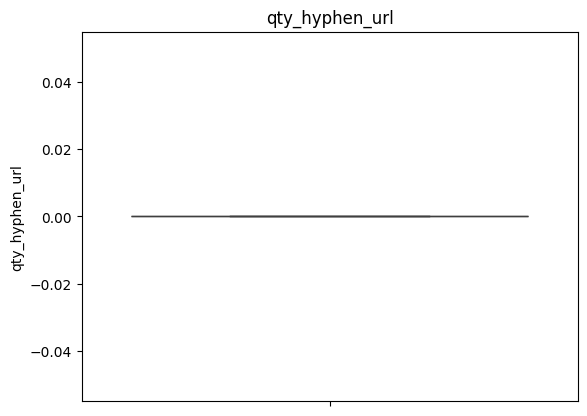

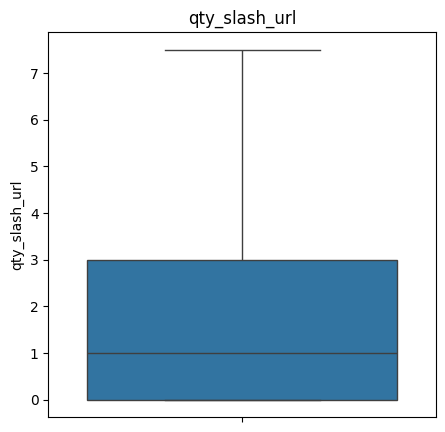

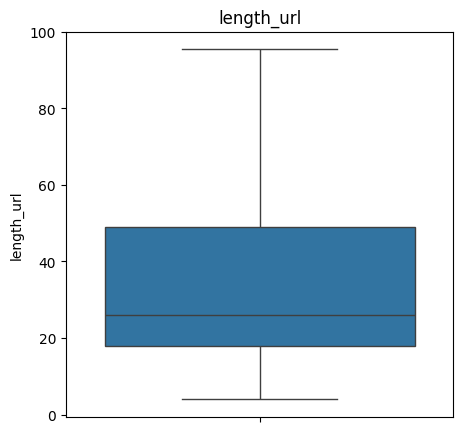

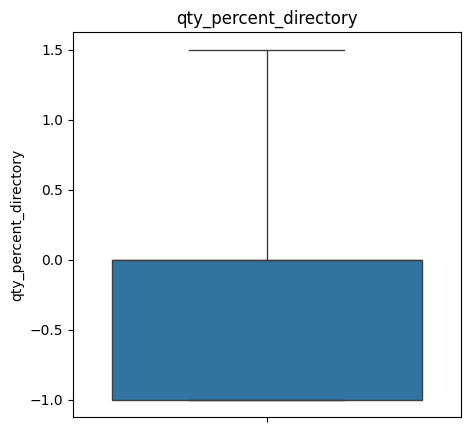

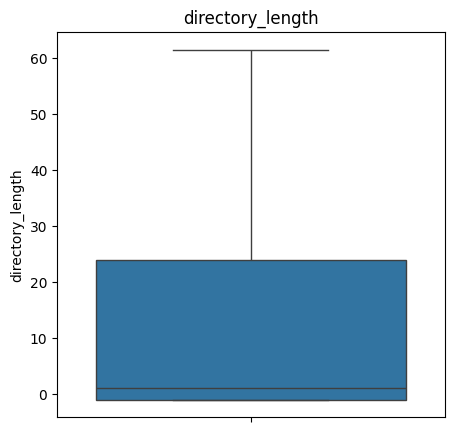

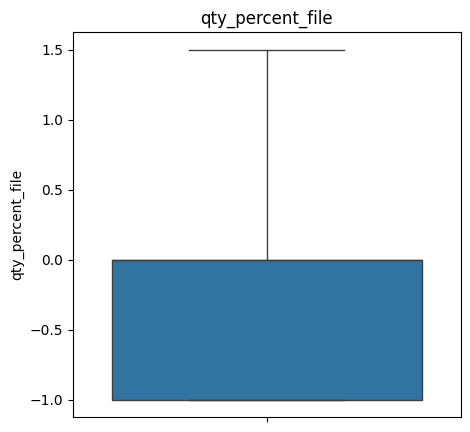

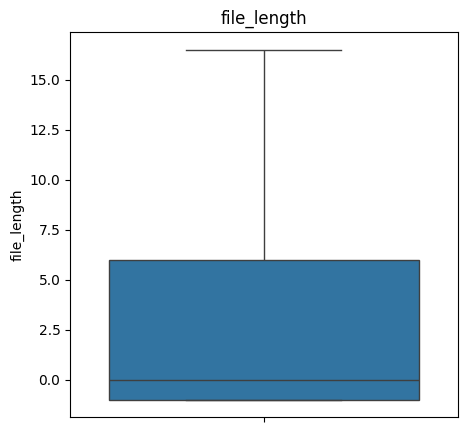

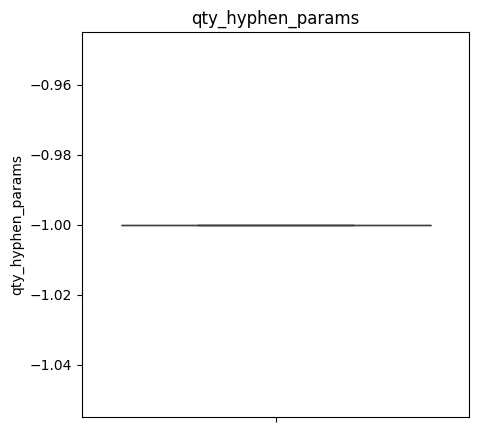

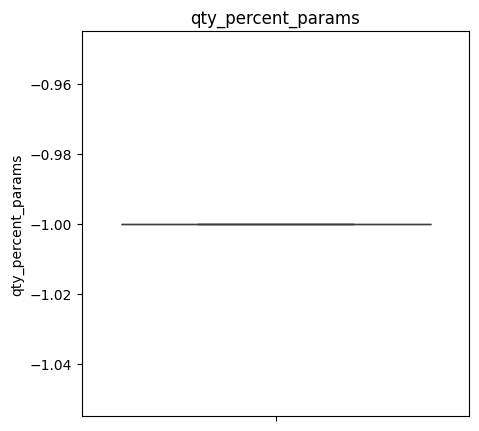

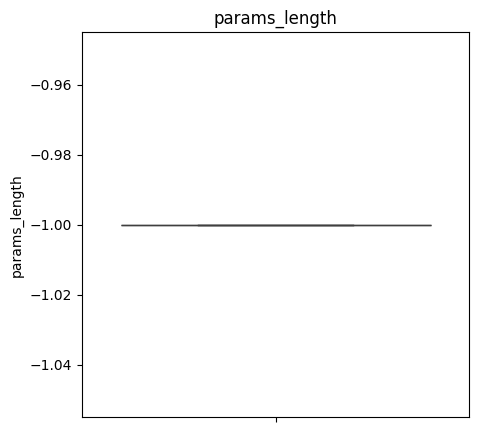

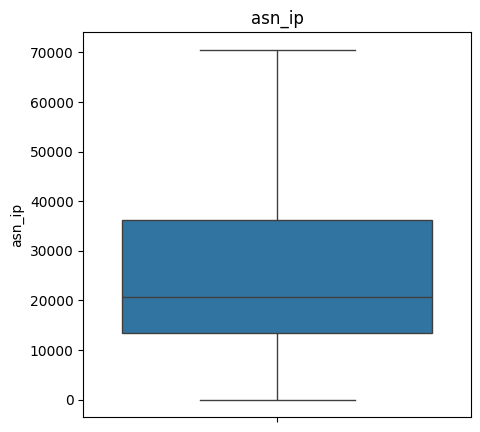

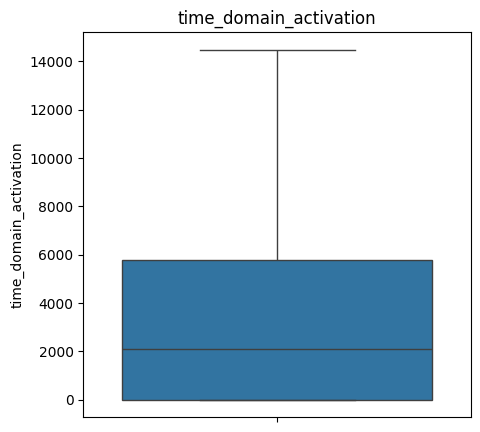

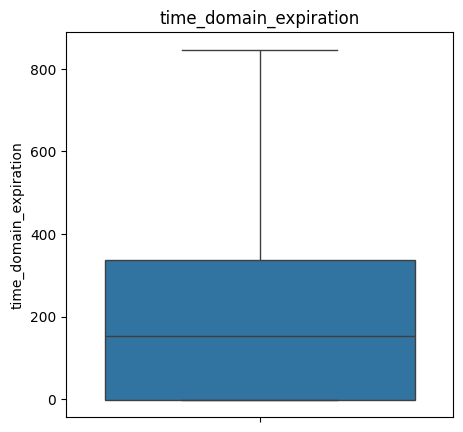

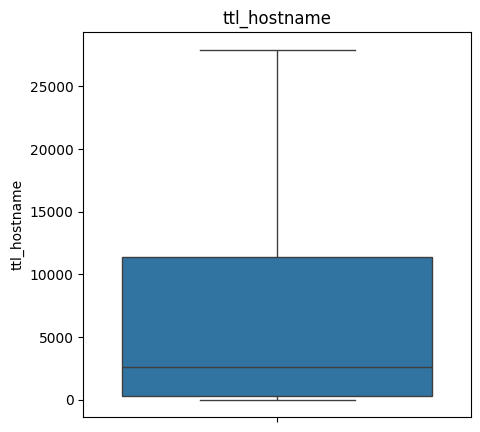

<Figure size 500x500 with 0 Axes>

In [314]:
for feature in continuous_feature:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

In [315]:
for feature in discrete_feature:
    IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    df.loc[df[feature]<lower_bridge,feature]=lower_bridge
    df.loc[df[feature]>=upper_bridge,feature]=upper_bridge

C:\Users\mis\AppData\Local\Temp\ipykernel_12476\1682463376.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


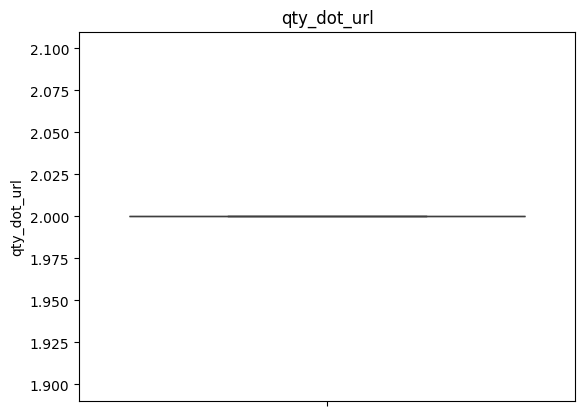

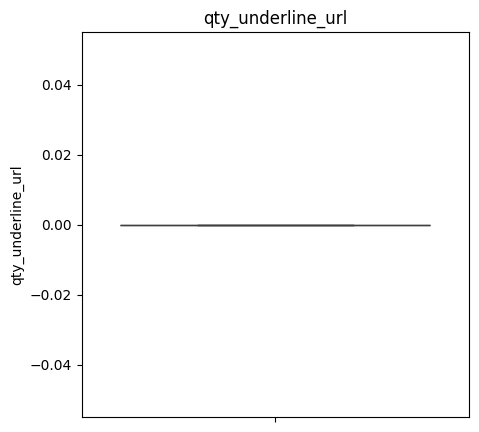

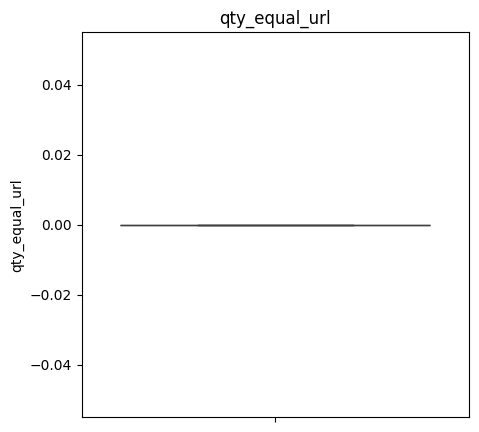

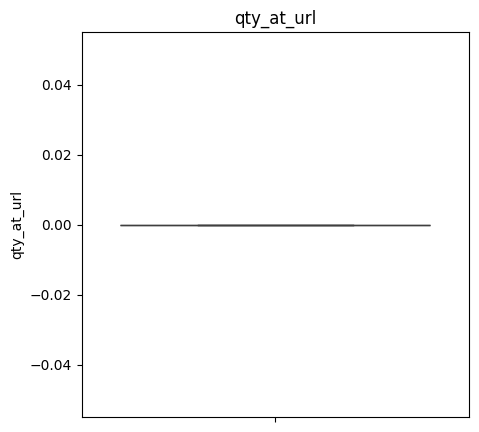

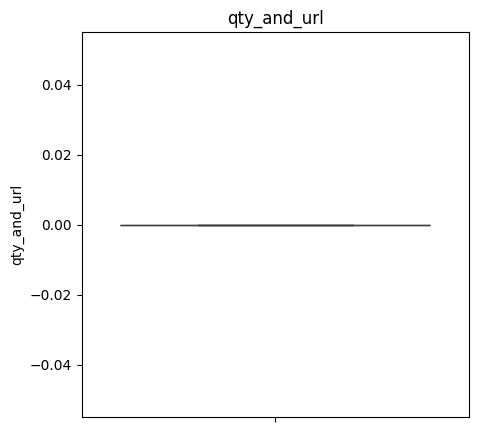

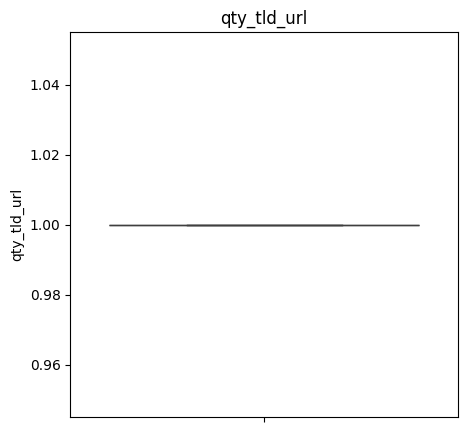

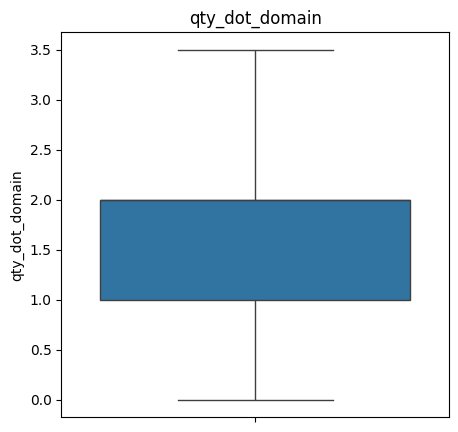

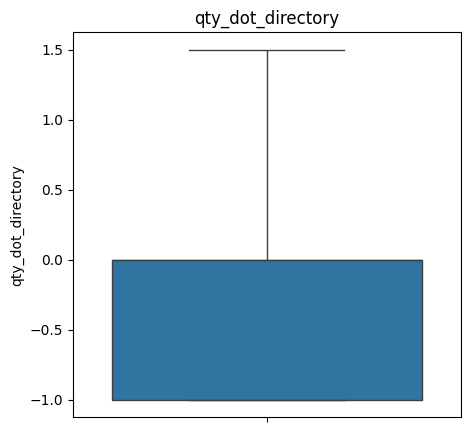

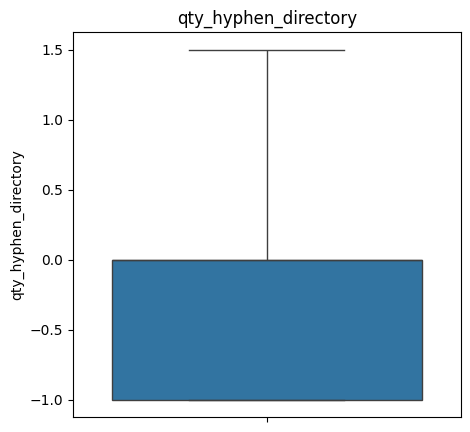

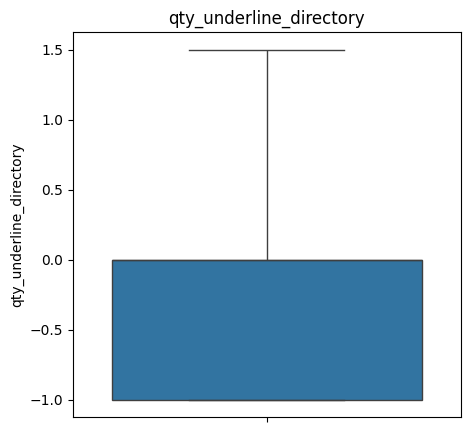

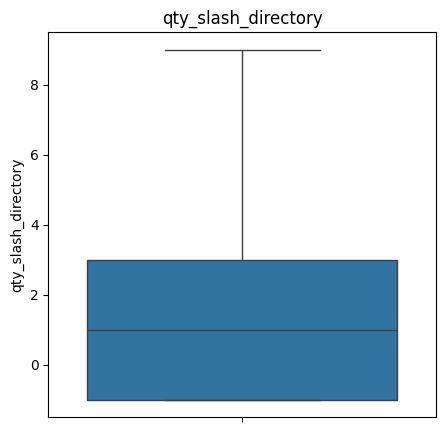

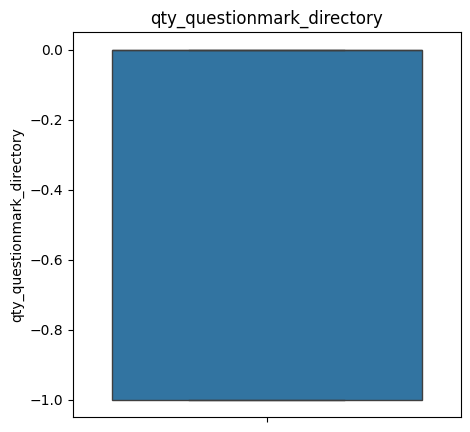

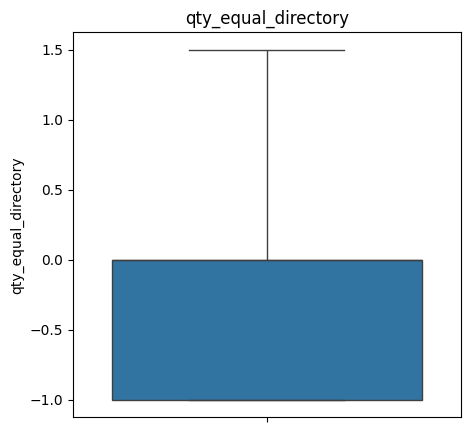

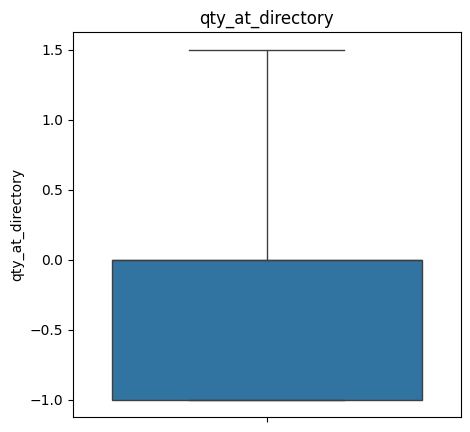

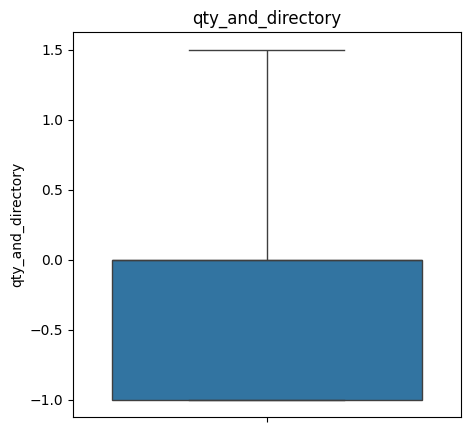

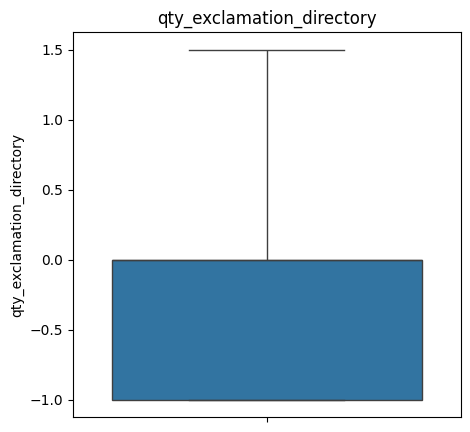

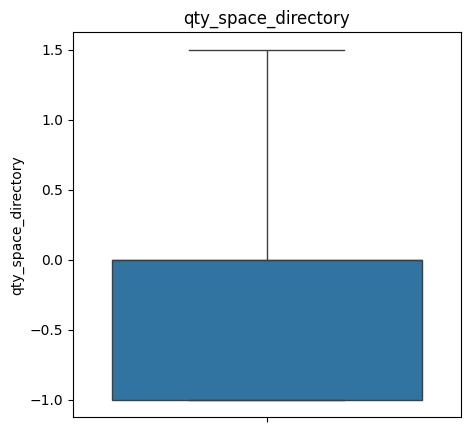

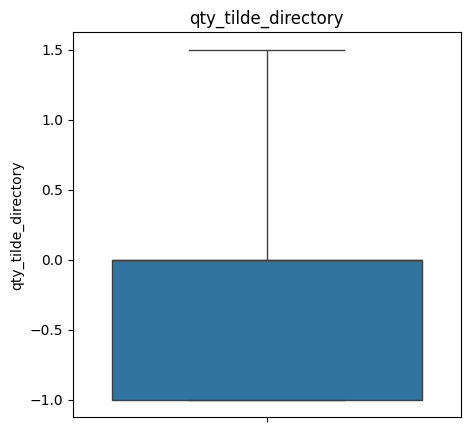

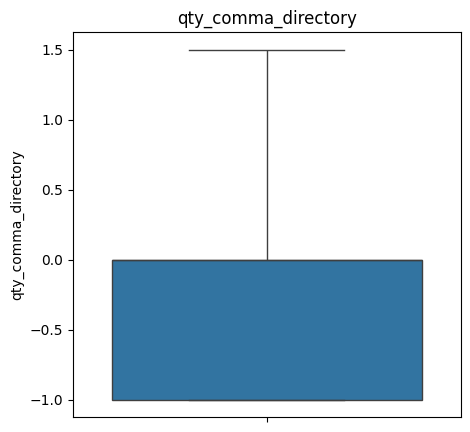

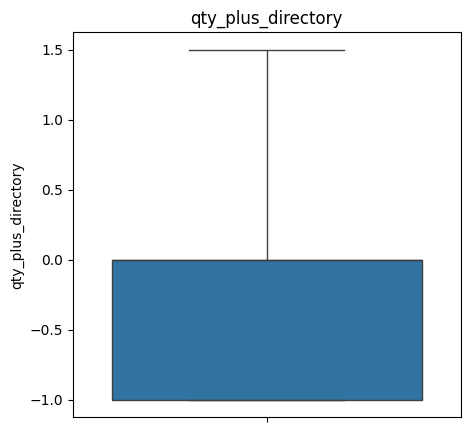

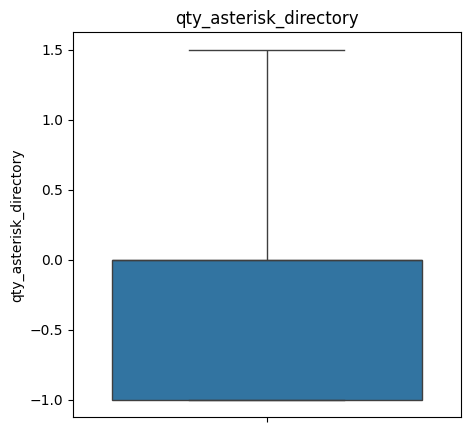

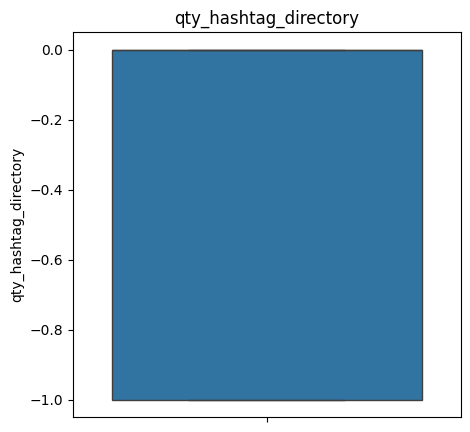

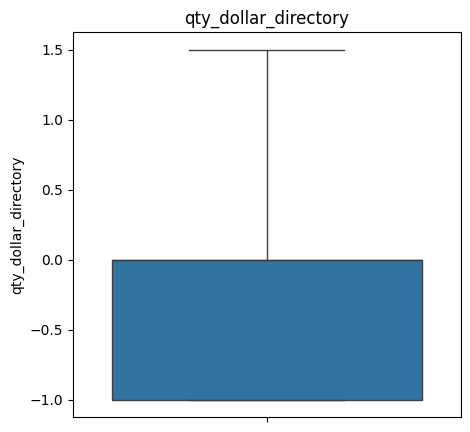

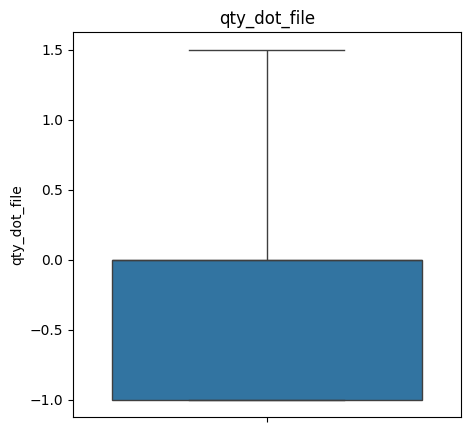

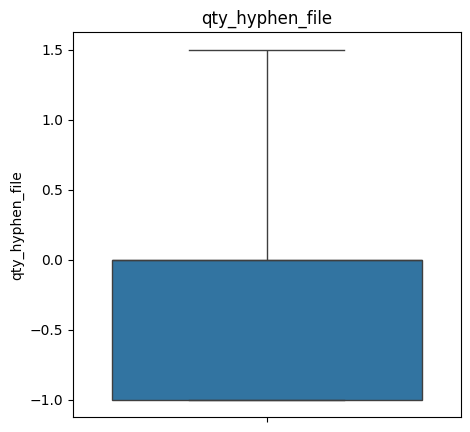

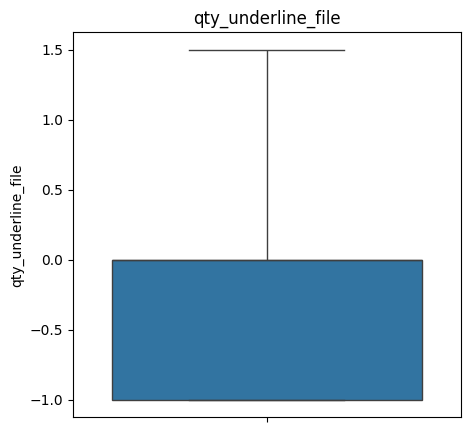

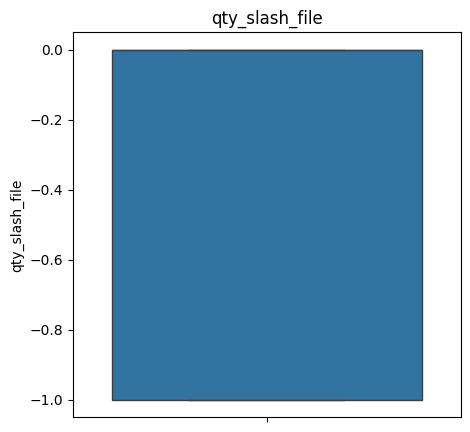

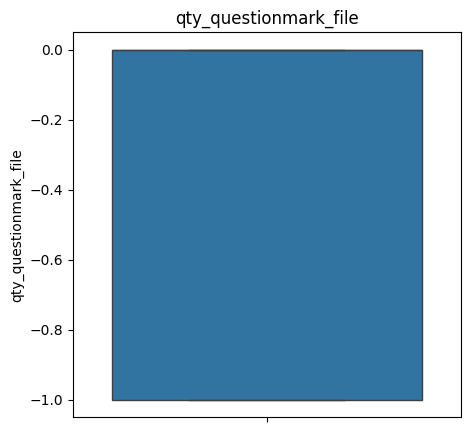

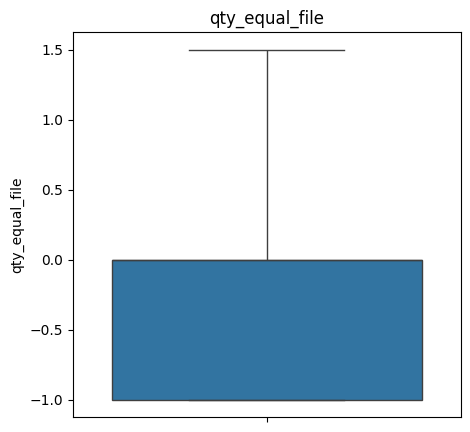

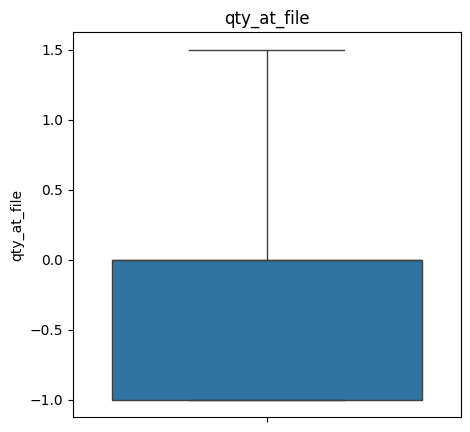

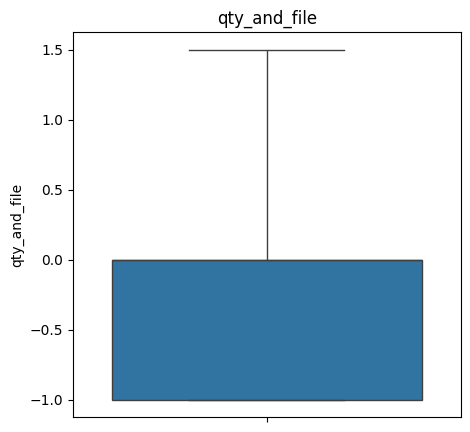

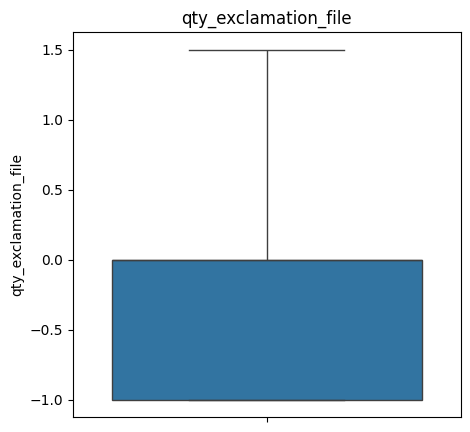

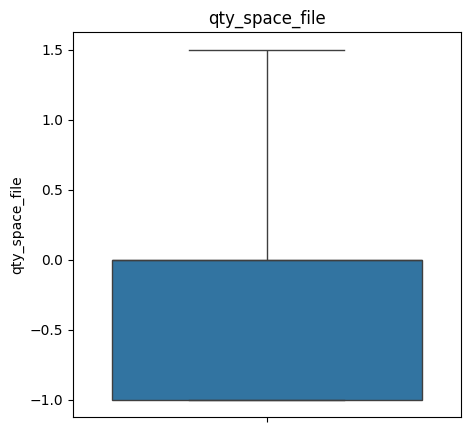

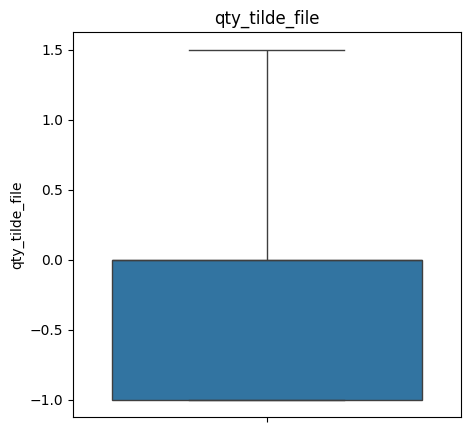

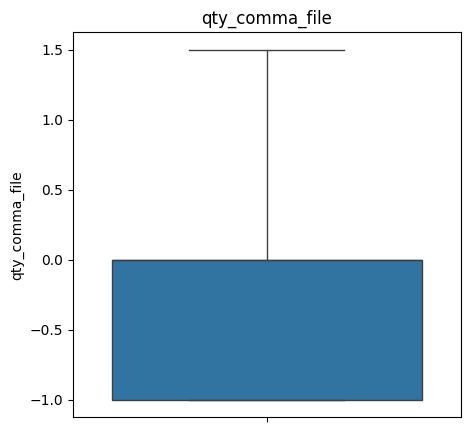

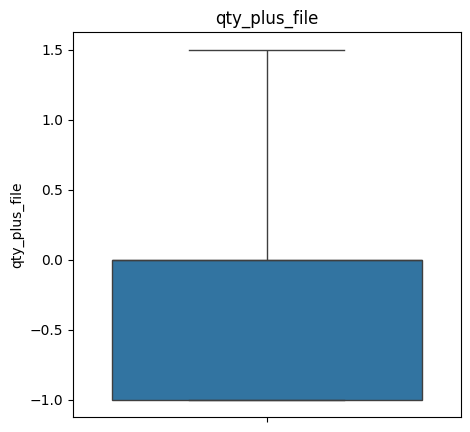

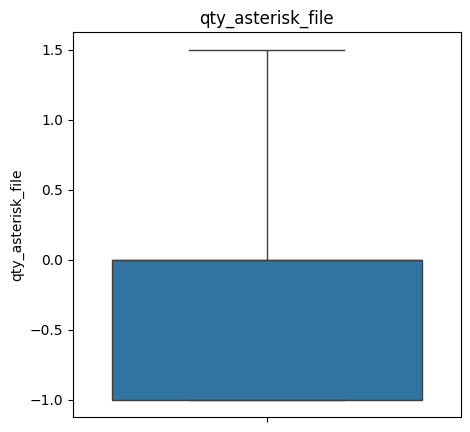

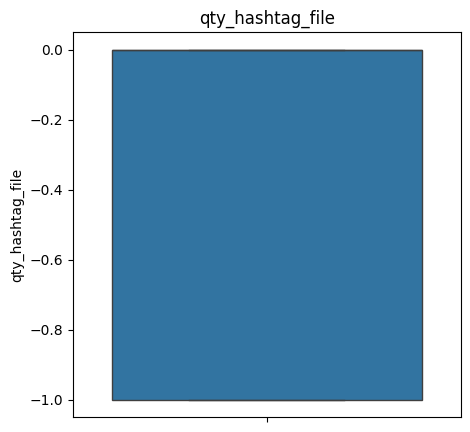

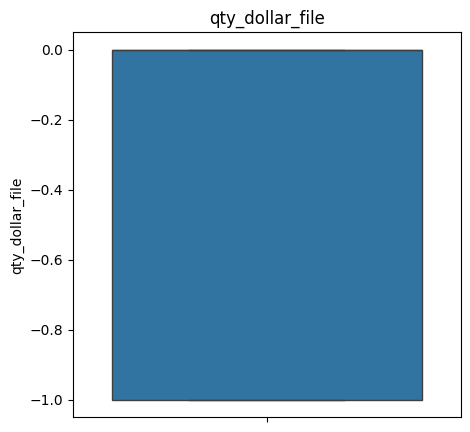

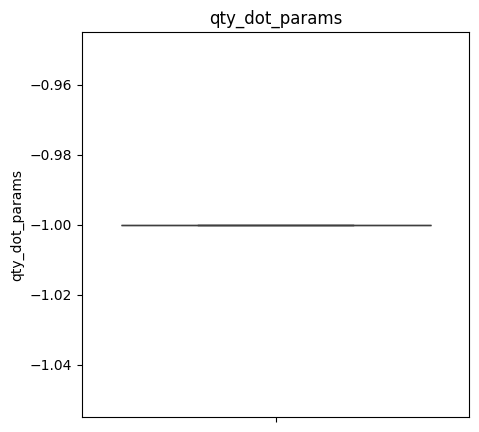

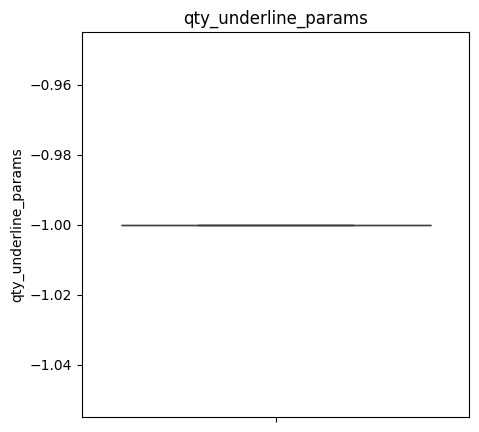

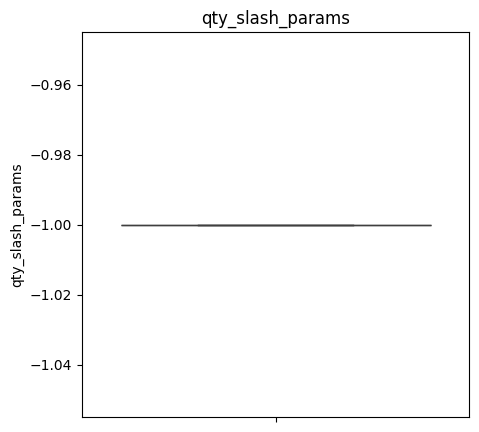

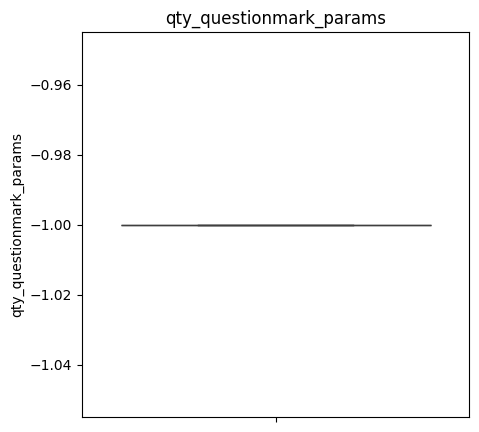

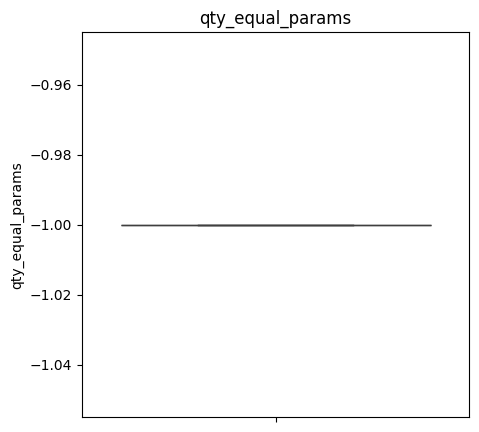

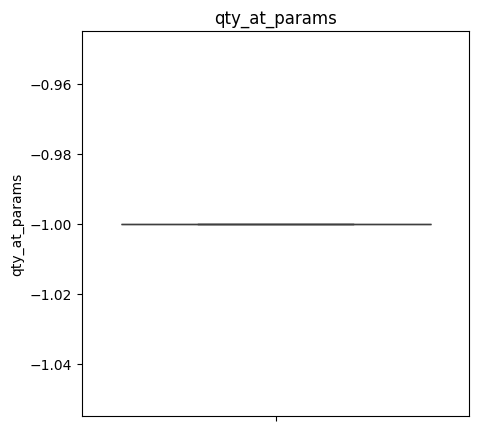

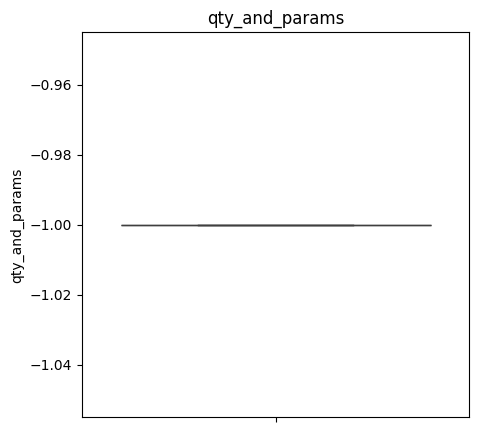

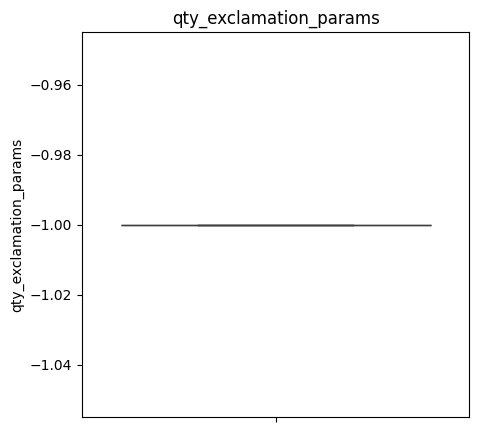

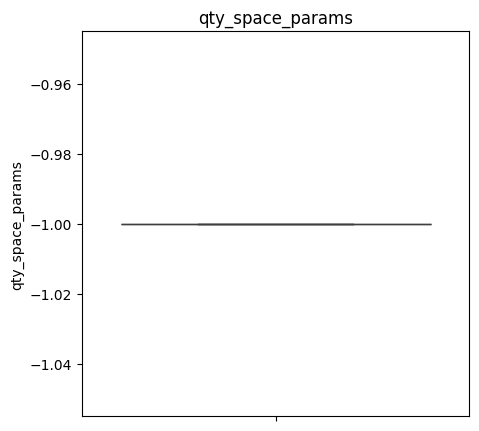

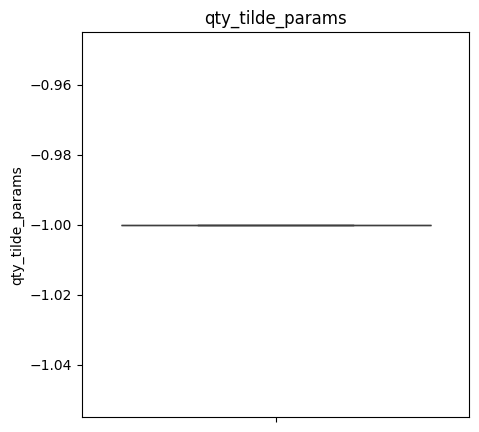

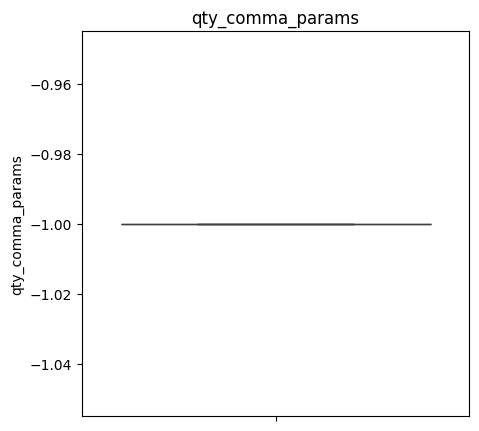

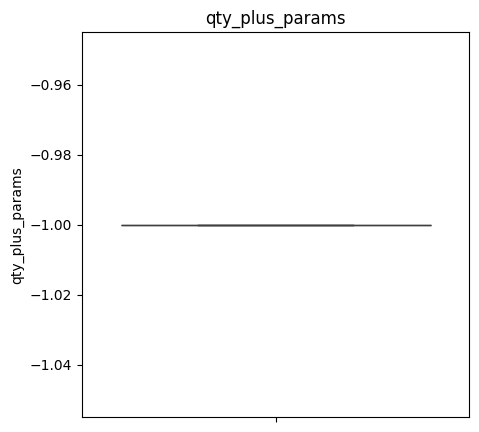

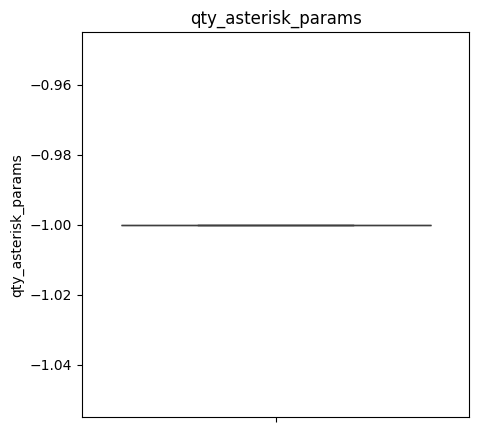

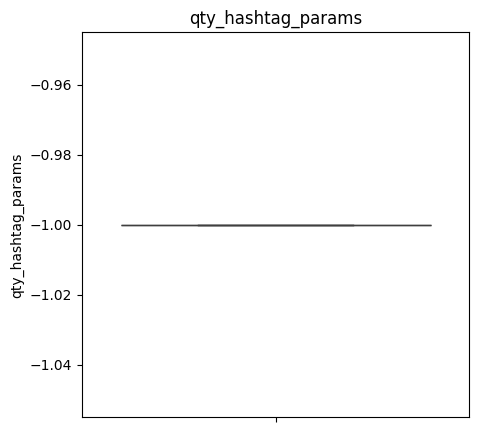

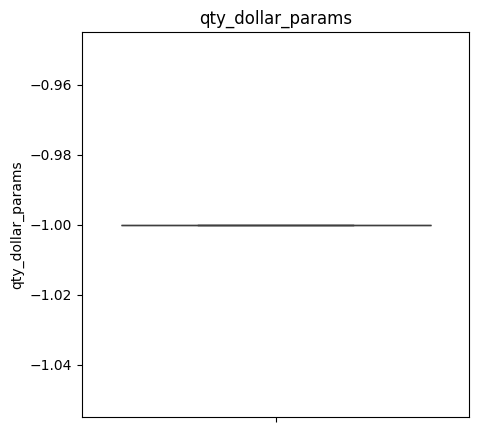

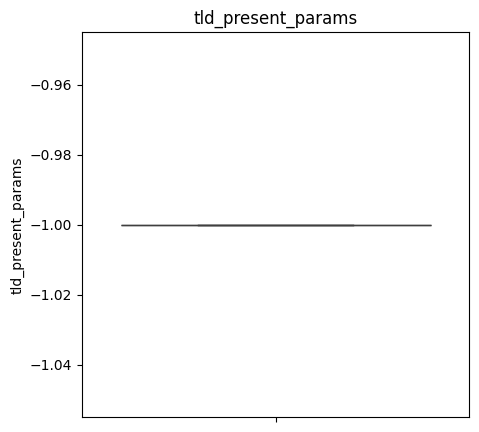

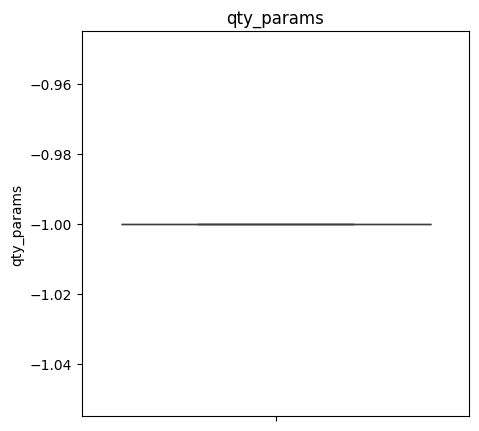

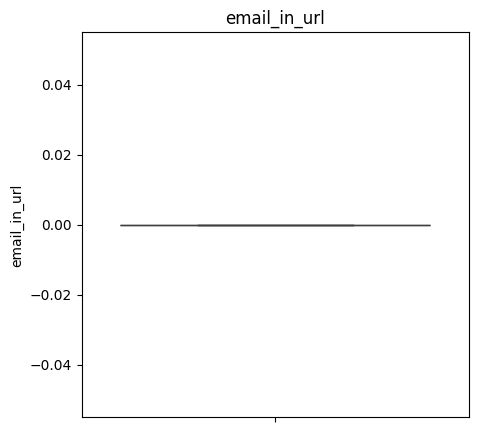

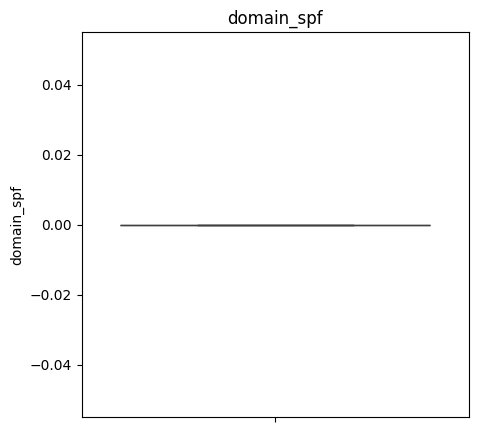

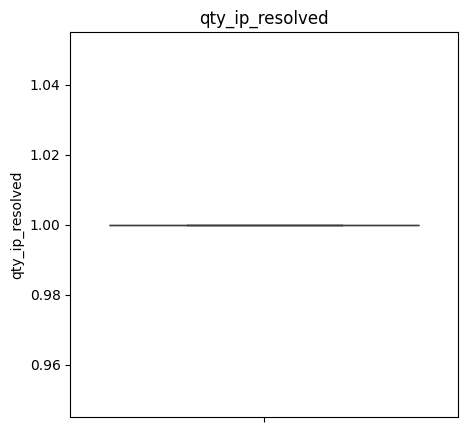

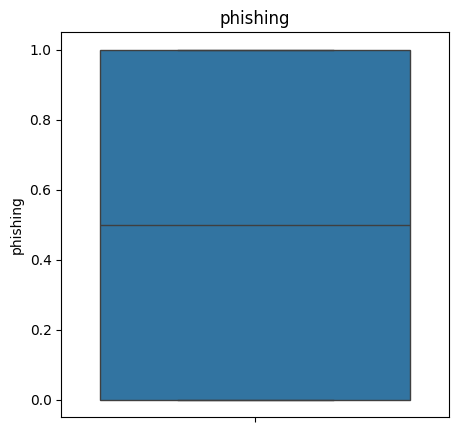

<Figure size 500x500 with 0 Axes>

In [316]:
for feature in discrete_feature:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

In [317]:
X=df.drop(labels="phishing",axis=1)
Y=df[["phishing"]]

In [318]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [319]:
#threshold=85% that is if they are correlated by 85%
corr_features = correlation(X, 0.85)
len(set(corr_features))

32

In [320]:
#features which are going to get dropped
corr_features

{'directory_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_at_directory',
 'qty_at_file',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hyphen_file',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_underline_file'}

In [321]:
X.drop(corr_features,axis=1,inplace=True)

In [322]:
X.shape

(116000, 41)

In [323]:
#threshold=85% that is if they are correlated by 85%


In [324]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [325]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

30


In [326]:
for column in constant_columns:
    print(column)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_equal_url
qty_at_url
qty_and_url
qty_tld_url
qty_dot_params
qty_hyphen_params
qty_underline_params
qty_slash_params
qty_questionmark_params
qty_equal_params
qty_at_params
qty_and_params
qty_exclamation_params
qty_space_params
qty_tilde_params
qty_comma_params
qty_plus_params
qty_asterisk_params
qty_hashtag_params
qty_dollar_params
qty_percent_params
params_length
tld_present_params
qty_params
email_in_url
domain_spf
qty_ip_resolved


In [327]:
X.drop(constant_columns,axis=1,inplace=True)

In [328]:
X.shape

(116000, 11)

In [329]:
df_final=pd.DataFrame(X)

In [330]:
df_final

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0                 1.0        25.0             2.0                1.0   
1                 3.0        95.5             2.0                1.5   
2                 1.0        15.0             2.0                0.0   
3                 5.0        81.0             2.0                1.5   
4                 0.0        19.0             2.0               -1.0   
...               ...         ...             ...                ...   
115995            3.0        41.0             1.0                1.0   
115996            1.0        95.5             2.0                0.0   
115997            1.0        22.0             1.0                0.0   
115998            3.0        95.5             2.0                0.0   
115999            3.0        47.0             1.0                1.0   

        qty_hyphen_directory  qty_underline_directory  file_length   asn_ip  \
0                        0.0                      0.0          7.0  60781.0   
1                        0.0                      0.0          9.0  36024.0   
2                        0.0                      0.0          0.0   4766.0   
3                        0.0                      1.5          9.0  20454.0   
4                       -1.0                     -1.0         -1.0  53831.0   
...                      ...                      ...          ...      ...   
115995                   0.0                      0.0          9.0  43139.0   
115996                   0.0                      0.0          0.0  14618.0   
115997                   0.0                      0.0          0.0  70542.5   
115998                   0.0                      0.0          5.0  70542.5   
115999                   0.0                      0.0          9.0  32219.0   

        time_domain_activation  time_domain_expiration  ttl_hostname  
0                           -1                    -1.0         892.0  
1                          579                   150.0        9540.0  
2                           -1                    -1.0         589.0  
3                           -1                    -1.0         292.0  
4                         6998                   306.0        3597.0  
...                        ...                     ...           ...  
115995                    3441                    15.0       14392.0  
115996                      -1                    -1.0          48.0  
115997                      78                   285.0         596.0  
115998                    2142                    47.0         392.0  
115999                    2800                   404.0        9152.0  

[116000 rows x 11 columns]

In [331]:
#scaler=StandardScaler()
scaled_features = StandardScaler().fit_transform(df_final.values)

scaled_features= pd.DataFrame(scaled_features, index=df_final.index, columns=df_final.columns)

In [332]:
scaled_features['phishing']=pd.DataFrame(Y)['phishing']

In [333]:
scaled_features

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0           -0.330953   -0.466624        0.385081           1.526241   
1            0.729962    2.343229        0.385081           2.165632   
2           -0.330953   -0.865185        0.385081           0.247461   
3            1.790878    1.765316        0.385081           2.165632   
4           -0.861411   -0.705760        0.385081          -1.031320   
...               ...         ...             ...                ...   
115995       0.729962    0.171073       -1.194739           1.526241   
115996      -0.330953    2.343229        0.385081           0.247461   
115997      -0.330953   -0.586192       -1.194739           0.247461   
115998       0.729962    2.343229        0.385081           0.247461   
115999       0.729962    0.410209       -1.194739           1.526241   

        qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                   0.445760                 0.633983     0.779010  1.946768   
1                   0.445760                 0.633983     1.149761  0.563802   
2                   0.445760                 0.633983    -0.518618 -1.182321   
3                   0.445760                 3.235400     1.149761 -0.305964   
4                  -1.037187                -1.100295    -0.703994  1.558530   
...                      ...                      ...          ...       ...   
115995              0.445760                 0.633983     1.149761  0.961257   
115996              0.445760                 0.633983    -0.518618 -0.631972   
115997              0.445760                 0.633983    -0.518618  2.492061   
115998              0.445760                 0.633983     0.408259  2.492061   
115999              0.445760                 0.633983     1.149761  0.351248   

        time_domain_activation  time_domain_expiration  ttl_hostname  phishing  
0                    -1.007713               -0.873221     -0.697586       1.0  
1                    -0.809758               -0.312054      0.576359       1.0  
2                    -1.007713               -0.873221     -0.742221       0.0  
3                    -1.007713               -0.873221     -0.785972       1.0  
4                     1.381064                0.267694     -0.299110       0.0  
...                        ...                     ...           ...       ...  
115995                0.167051               -0.813759      1.291111       1.0  
115996               -1.007713               -0.873221     -0.821916       1.0  
115997               -0.980750                0.189651     -0.741190       1.0  
115998               -0.276302               -0.694837     -0.771241       1.0  
115999               -0.051724                0.631895      0.519202       1.0  

[116000 rows x 12 columns]

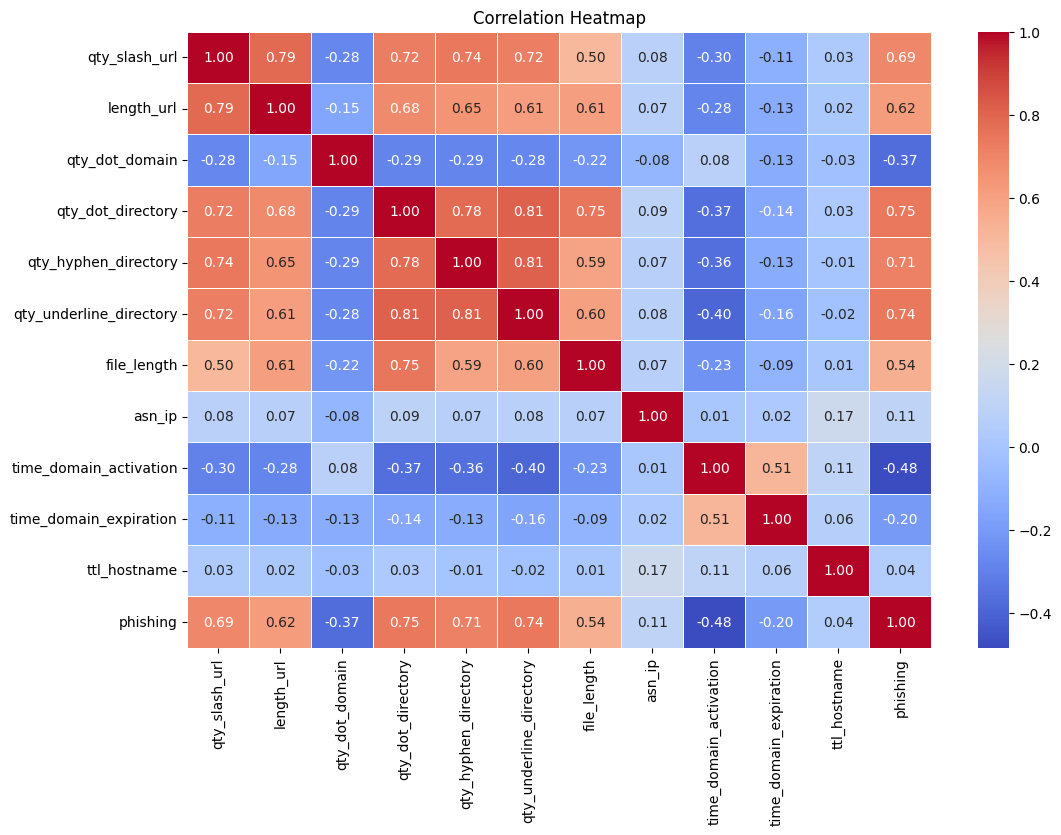

In [334]:
correlation_matrix = scaled_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [335]:
scaled_features.corr()['phishing']

qty_slash_url              0.692122
length_url                 0.621212
qty_dot_domain            -0.370590
qty_dot_directory          0.745028
qty_hyphen_directory       0.711297
qty_underline_directory    0.743691
file_length                0.542517
asn_ip                     0.106119
time_domain_activation    -0.483256
time_domain_expiration    -0.204947
ttl_hostname               0.044259
phishing                   1.000000
Name: phishing, dtype: float64

In [336]:
dependent_feature = 'phishing'  # Replace 'target' with the name of your dependent feature

# Calculate correlations with the dependent feature
correlation_with_target = scaled_features.corr()[dependent_feature]

# Select columns correlated 0.5 and above with the dependent feature
selected_columns = correlation_with_target[abs(correlation_with_target) >= 0.5].index.tolist()

# Exclude the dependent feature itself from the selected columns
if dependent_feature in selected_columns:
    selected_columns.remove(dependent_feature)

# Create a DataFrame with the selected columns
df = scaled_features[selected_columns + [dependent_feature]]


In [337]:
df

qty_slash_url  length_url  qty_dot_directory  qty_hyphen_directory  \
0           -0.330953   -0.466624           1.526241              0.445760   
1            0.729962    2.343229           2.165632              0.445760   
2           -0.330953   -0.865185           0.247461              0.445760   
3            1.790878    1.765316           2.165632              0.445760   
4           -0.861411   -0.705760          -1.031320             -1.037187   
...               ...         ...                ...                   ...   
115995       0.729962    0.171073           1.526241              0.445760   
115996      -0.330953    2.343229           0.247461              0.445760   
115997      -0.330953   -0.586192           0.247461              0.445760   
115998       0.729962    2.343229           0.247461              0.445760   
115999       0.729962    0.410209           1.526241              0.445760   

        qty_underline_directory  file_length  phishing  
0                      0.633983     0.779010       1.0  
1                      0.633983     1.149761       1.0  
2                      0.633983    -0.518618       0.0  
3                      3.235400     1.149761       1.0  
4                     -1.100295    -0.703994       0.0  
...                         ...          ...       ...  
115995                 0.633983     1.149761       1.0  
115996                 0.633983    -0.518618       1.0  
115997                 0.633983    -0.518618       1.0  
115998                 0.633983     0.408259       1.0  
115999                 0.633983     1.149761       1.0  

[116000 rows x 7 columns]

In [340]:
df['phishing'].value_counts()

phishing
1.0    58000
0.0    58000
Name: count, dtype: int64

In [341]:
df.to_csv("preprocessed_data.csv",index=False)